<a href="https://colab.research.google.com/github/ChVenkatSai/Big-Data-Derby/blob/main/Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
from tqdm import tqdm
import re
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn import metrics

IMPORTING THE DATASET FILES

In [ ]:
#start table
df_start = pd.read_csv('/content/nyra_start_table.csv')
df_start

,AQU,2019-01-01,1,1,123,Dylan Davis,130,2
0,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3
1,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4
2,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5
3,AQU,2019-01-01,1,5,118,Manuel Franco,1150,1
4,AQU,2019-01-01,2,1,121,Jose Lezcano,220,2
...,...,...,...,...,...,...,...,...
14909,SAR,2019-09-02,11,3,119,Manuel Franco,1470,2
14910,SAR,2019-09-02,11,4,119,Jose Lezcano,1070,5
14911,SAR,2019-09-02,11,6,119,Eric Cancel,1130,10
14912,SAR,2019-09-02,11,7,119,Irad Ortiz Jr.,460,7


In [ ]:
#race table
df_race = pd.read_csv('/content/nyra_race_table.csv')
df_race

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,AQU,2019-01-01,1,650,D,MY,36,AOC,80000,1220
1,AQU,2019-01-01,2,600,D,MY,48,MCL,41000,1250
2,AQU,2019-01-01,3,550,D,MY,54,MCL,35000,121
3,AQU,2019-01-01,4,900,D,MY,101,AOC,80000,150
4,AQU,2019-01-01,5,700,D,MY,60,ALW,64000,220
...,...,...,...,...,...,...,...,...,...,...
1995,SAR,2019-09-02,7,900,D,SY,79,CLM,48000,356
1996,SAR,2019-09-02,8,700,D,SY,32,AOC,83000,433
1997,SAR,2019-09-02,9,850,I,SF,22,STK,250000,507
1998,SAR,2019-09-02,10,700,D,SY,32,STK,350000,540


In [ ]:
#tracking table
df_tracking = pd.read_csv('/content/nyra_tracking_table.csv')
df_tracking

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude
0,AQU,2019-01-01,9,6,72,40.67,-73.83
1,AQU,2019-01-01,9,6,73,40.67,-73.83
2,AQU,2019-01-01,9,6,74,40.67,-73.83
3,AQU,2019-01-01,9,6,63,40.67,-73.83
4,AQU,2019-01-01,9,6,64,40.67,-73.83
...,...,...,...,...,...,...,...
5228425,AQU,2019-11-23,9,2,167,40.67,-73.83
5228426,AQU,2019-11-23,9,2,168,40.67,-73.83
5228427,AQU,2019-11-23,9,2,169,40.67,-73.83
5228428,AQU,2019-11-23,9,2,170,40.67,-73.83


In [ ]:
#complete table
df_complete = pd.read_csv('/content/nyra_2019_complete.csv')
df_complete

,AQU,2019-01-01,9,6,72,40.6729017197787,-73.8276065972899,600,D,GD,48,CLM,25000.00,00420,120,Andre Shivnarine Worrie,2090,8
0,AQU,2019-01-01,9,6,73,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,74,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,63,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,64,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,65,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228424,AQU,2019-11-23,9,2,167,40.67,-73.83,1100,T,GD,72,STK,200000.00,353,124,Joel Rosario,1120,9
5228425,AQU,2019-11-23,9,2,168,40.67,-73.83,1100,T,GD,72,STK,200000.00,353,124,Joel Rosario,1120,9
5228426,AQU,2019-11-23,9,2,169,40.67,-73.83,1100,T,GD,72,STK,200000.00,353,124,Joel Rosario,1120,9
5228427,AQU,2019-11-23,9,2,170,40.67,-73.83,1100,T,GD,72,STK,200000.00,353,124,Joel Rosario,1120,9


In [ ]:
# We see that the start and complete tables don't have column headers.
# So, we add the column names and then add the overwritten rows to the dataset.

ADDING COLUMN NAMES TO START TABLE

In [ ]:
df_start.columns=["track_id", "race_date", "race_number", "program_number", "weight_carried", "jockey", "odds", "position" ]

In [ ]:
df_start.columns

Index(['track_id', 'race_date', 'race_number', 'program_number',
       'weight_carried', 'jockey', 'odds', 'position'],
      dtype='object')

In [ ]:
type(df_start["race_date"][1])

str

In [ ]:
df_start.loc[len(df_start.index)] = ['AQU', '2019-01-01', 1, '1  ', 123, 'Dylan Davis', 130, 2]

In [ ]:
df_start

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position
0,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3
1,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4
2,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5
3,AQU,2019-01-01,1,5,118,Manuel Franco,1150,1
4,AQU,2019-01-01,2,1,121,Jose Lezcano,220,2
...,...,...,...,...,...,...,...,...
14910,SAR,2019-09-02,11,4,119,Jose Lezcano,1070,5
14911,SAR,2019-09-02,11,6,119,Eric Cancel,1130,10
14912,SAR,2019-09-02,11,7,119,Irad Ortiz Jr.,460,7
14913,SAR,2019-09-02,11,8,119,Luis Saez,110,6


In [ ]:
set(df_start['weight_carried'])

{110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 132,
 142,
 143,
 144,
 146,
 147,
 148,
 149,
 150,
 152,
 153,
 154,
 155,
 156,
 158,
 160}

ADDING COLUMN NAMES TO COMPLETE TABLE

In [ ]:
df_complete.columns = ["track_id","race_date","race_number","program_number","trakus_index","latitude","longitude","distance_id","course_type","track_condition","run_up_distance","race_type","purse","post_time","weight_carried","jockey","odds","position"]
df_complete

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position
0,AQU,2019-01-01,9,6,73,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,74,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,63,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,64,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,65,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228424,AQU,2019-11-23,9,2,167,40.67,-73.83,1100,T,GD,72,STK,200000.00,353,124,Joel Rosario,1120,9
5228425,AQU,2019-11-23,9,2,168,40.67,-73.83,1100,T,GD,72,STK,200000.00,353,124,Joel Rosario,1120,9
5228426,AQU,2019-11-23,9,2,169,40.67,-73.83,1100,T,GD,72,STK,200000.00,353,124,Joel Rosario,1120,9
5228427,AQU,2019-11-23,9,2,170,40.67,-73.83,1100,T,GD,72,STK,200000.00,353,124,Joel Rosario,1120,9


In [ ]:
type(df_complete["race_date"][1])

str

In [ ]:
df_complete.loc[len(df_complete.index)] = ['AQU', '2019-01-01', 9, '6  ', 72, 40.67, -73.83, 600, 'D', 'GD', 48.0, 'CLM', 25000.00, '00420', 120, 'Andre Shivnarine Worrie', 2090, 8.0]

In [ ]:
df_complete

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position
0,AQU,2019-01-01,9,6,73,40.67,-73.83,600,D,GD,48.00,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8.00
1,AQU,2019-01-01,9,6,74,40.67,-73.83,600,D,GD,48.00,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8.00
2,AQU,2019-01-01,9,6,63,40.67,-73.83,600,D,GD,48.00,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8.00
3,AQU,2019-01-01,9,6,64,40.67,-73.83,600,D,GD,48.00,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8.00
4,AQU,2019-01-01,9,6,65,40.67,-73.83,600,D,GD,48.00,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228425,AQU,2019-11-23,9,2,168,40.67,-73.83,1100,T,GD,72.00,STK,200000.00,353,124,Joel Rosario,1120,9.00
5228426,AQU,2019-11-23,9,2,169,40.67,-73.83,1100,T,GD,72.00,STK,200000.00,353,124,Joel Rosario,1120,9.00
5228427,AQU,2019-11-23,9,2,170,40.67,-73.83,1100,T,GD,72.00,STK,200000.00,353,124,Joel Rosario,1120,9.00
5228428,AQU,2019-11-23,9,2,171,40.67,-73.83,1100,T,GD,72.00,STK,200000.00,353,124,Joel Rosario,1120,9.00


CHECKING IF THE TABLES HAVE NAN VALUES

In [ ]:
def check_nan(df):
  nan_in_df = df.isnull().values.any()
  print(nan_in_df)

In [ ]:
check_nan(df_start)

False


In [ ]:
check_nan(df_race)

False


In [ ]:
check_nan(df_tracking)

False


In [ ]:
check_nan(df_complete)

False


**PRE-PROCESSING THE TABLES**

COMPLETE TABLE

In [ ]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5228430 entries, 0 to 5228429
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   track_id         object 
 1   race_date        object 
 2   race_number      int64  
 3   program_number   object 
 4   trakus_index     int64  
 5   latitude         float64
 6   longitude        float64
 7   distance_id      int64  
 8   course_type      object 
 9   track_condition  object 
 10  run_up_distance  float64
 11  race_type        object 
 12  purse            float64
 13  post_time        object 
 14  weight_carried   int64  
 15  jockey           object 
 16  odds             int64  
 17  position         float64
dtypes: float64(5), int64(5), object(8)
memory usage: 757.9+ MB


In [ ]:
set(df_complete["program_number"])

{1,
 '1  ',
 10,
 '10 ',
 11,
 '11 ',
 12,
 '12 ',
 13,
 '13 ',
 14,
 '14 ',
 15,
 '15 ',
 16,
 '16 ',
 '1A ',
 '1X ',
 2,
 '2  ',
 '2B ',
 3,
 '3  ',
 '3X ',
 4,
 '4  ',
 5,
 '5  ',
 6,
 '6  ',
 7,
 '7  ',
 8,
 '8  ',
 9,
 '9  '}

In [ ]:
# Since we have all the formats that can be optimized, we change the datatypes so as to make processing easier

In [ ]:
def convert_program_number(df):
  r1 = re.compile('\d+'); is_string = lambda x : type(x) == str
  l1 = [i.split()[0] if type(i) == str else i for i in list(df['program_number'])] ; l2 = []
  for i in l1:
      if is_string(i) == True:
          try:
              if int(r1.findall(i)[0]) == int(i):
                  l2.append(int(r1.findall(i)[0]))
          except ValueError:
              l2.append(i)
      else :
          l2.append(i)

  return l2

In [ ]:
le_jockey=LabelEncoder()
def label_encoder(df, features):
  global le_jockey
  le = LabelEncoder()
  for i in features:
    df[i] = le.fit_transform(df[i])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(i, le_name_mapping)
    if(i=="jockey"):
      jockey_mapping=dict(zip(le.classes_, le.transform(le.classes_)))
      le_jockey=le
  return df

In [ ]:
df_complete['race_number'] = df_complete['race_number'].astype('int8') # 1 - race_number

# l2 = convert_program_number(df_complete)
# df_complete['program_number'] = l2
df_complete['program_number'] = df_complete['program_number'].astype(str)
df_complete['trakus_index'] = df_complete['trakus_index'].astype('int16')
df_complete['latitude'] = df_complete['latitude'].astype('float16')
df_complete['longitude'] = df_complete['longitude'].astype('float16')
df_complete['distance_id'] = df_complete['distance_id'].astype('int16')
df_complete['run_up_distance'] = df_complete['run_up_distance'].astype('int16')
df_complete['purse'] = df_complete['purse'].astype(float); df_complete['purse'] = df_complete['purse'].astype('int32') # 8 - purse
df_complete['weight_carried'] = df_complete['weight_carried'].astype('int8')
df_complete['odds'] = df_complete['odds'].astype('int16')
df_complete['position'] = df_complete['position'].astype('int8')
df_complete['post_time'] = df_complete['post_time'].astype(str)
l1 = list(df_complete['post_time']);
l2 = list(df_complete['race_date'])

l = []
for i,j in zip(l1,l2):
    if len(i) == 3:
        l.append(i[:1] + ':' + i[1:] + ' ' + j)
    elif len(i) == 4:
        l.append(i[:2] + ':' + i[2:] + ' ' + j)
    elif len(i) == 5:
        l.append(i[1:3] + ':' + i[3:] + ' ' + j)
l = pd.to_datetime(pd.Series(l),format = '%H:%M %Y-%m-%d')
df_complete['post_time'] = l

date_dict = dict(zip(pd.date_range("2019-01-01", "2019-12-31").strftime("%Y-%m-%d"),
                     pd.date_range("2019-01-01", "2019-12-31")))

df_complete['race_date'] = df_complete.race_date.map(date_dict)

In [ ]:
set(df_complete["program_number"])

{'1',
 '1  ',
 '10',
 '10 ',
 '11',
 '11 ',
 '12',
 '12 ',
 '13',
 '13 ',
 '14',
 '14 ',
 '15',
 '15 ',
 '16',
 '16 ',
 '1A ',
 '1X ',
 '2',
 '2  ',
 '2B ',
 '3',
 '3  ',
 '3X ',
 '4',
 '4  ',
 '5',
 '5  ',
 '6',
 '6  ',
 '7',
 '7  ',
 '8',
 '8  ',
 '9',
 '9  '}

In [ ]:
#We have 5 columns that contain string values. To consider them as features, we encode them using labelencoder

In [ ]:
complete_text_features = ['track_id', 'course_type', 'track_condition', 'race_type', 'jockey']
df_complete=label_encoder(df_complete, complete_text_features)

track_id {'AQU': 0, 'BEL': 1, 'SAR': 2}
course_type {'D': 0, 'I': 1, 'M': 2, 'O': 3, 'T': 4}
track_condition {'FM ': 0, 'FT ': 1, 'GD': 2, 'GD ': 3, 'MY ': 4, 'SF ': 5, 'SY ': 6, 'YL ': 7}
race_type {'ALW': 0, 'AOC': 1, 'CLM': 2, 'MCL': 3, 'MSW': 4, 'SHP': 5, 'SOC': 6, 'SST': 7, 'STK': 8, 'STR': 9, 'WCL': 10, 'WMC': 11}
jockey {'Abner Adorno': 0, 'Adam Beschizza': 1, 'Adam Bowman': 2, 'Adrian Flores': 3, 'Alex Cintron': 4, 'Andre Shivnarine Worrie': 5, 'Andrea Atzeni': 6, 'Andrea C. Rodriguez': 7, 'Andrew Wolfsont': 8, 'Angel Castillo': 9, 'Angel Cruz': 10, 'Angel R. Rodriguez': 11, 'Angel Suarez': 12, 'Anthony Salgado': 13, 'Antonio A. Gallardo': 14, 'Arienne Cox': 15, 'Barry Foley': 16, 'Ben Curtis': 17, 'Benjamin Hernandez': 18, 'Bernard Dalton': 19, 'Brian Joseph Hernandez Jr.': 20, 'Carlos J. Hernandez': 21, 'Carol Cedeno': 22, 'Channing Hill': 23, 'Charles C. Lopez': 24, 'Charlie Amaro': 25, 'Chris Landeros': 26, 'Christian Santiago Reyes': 27, 'Christophe Soumillon': 28, 'Christ

In [ ]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5228430 entries, 0 to 5228429
Data columns (total 18 columns):
 #   Column           Dtype         
---  ------           -----         
 0   track_id         int64         
 1   race_date        datetime64[ns]
 2   race_number      int8          
 3   program_number   object        
 4   trakus_index     int16         
 5   latitude         float16       
 6   longitude        float16       
 7   distance_id      int16         
 8   course_type      int64         
 9   track_condition  int64         
 10  run_up_distance  int16         
 11  race_type        int64         
 12  purse            int32         
 13  post_time        datetime64[ns]
 14  weight_carried   int8          
 15  jockey           int64         
 16  odds             int16         
 17  position         int8          
dtypes: datetime64[ns](2), float16(2), int16(4), int32(1), int64(5), int8(3), object(1)
memory usage: 453.7+ MB


START TABLE

In [ ]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14915 entries, 0 to 14914
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   track_id        14915 non-null  object
 1   race_date       14915 non-null  object
 2   race_number     14915 non-null  int64 
 3   program_number  14915 non-null  object
 4   weight_carried  14915 non-null  int64 
 5   jockey          14915 non-null  object
 6   odds            14915 non-null  int64 
 7   position        14915 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.0+ MB


In [ ]:
df_start['race_number'] = df_start['race_number'].astype('int8')
# l2 = convert_program_number(df_start)
# df_start['program_number'] = l2
df_start['program_number'] = df_start['program_number'].astype(str)
df_start['weight_carried'] = df_start['weight_carried'].astype('int16')
df_start['odds'] = df_start['odds'].astype('int16')
df_start['position'] = df_start['position'].astype('int8')
date_dict = dict(zip(pd.date_range("2019-01-01", "2019-12-31").strftime("%Y-%m-%d"),
                     pd.date_range("2019-01-01", "2019-12-31")))
df_start['race_date'] = df_start.race_date.map(date_dict)

In [ ]:
# We have 2 columns that contain string values. To consider them as features, we encode them using labelencoder

In [ ]:
start_text_features = ['track_id', 'jockey']
df_start=label_encoder(df_start, start_text_features)

track_id {'AQU': 0, 'BEL': 1, 'SAR': 2}
jockey {'Abner Adorno': 0, 'Adam Beschizza': 1, 'Adam Bowman': 2, 'Adrian Flores': 3, 'Alex Cintron': 4, 'Andre Shivnarine Worrie': 5, 'Andrea Atzeni': 6, 'Andrea C. Rodriguez': 7, 'Andrew Wolfsont': 8, 'Angel Castillo': 9, 'Angel Cruz': 10, 'Angel R. Rodriguez': 11, 'Angel Suarez': 12, 'Anthony Salgado': 13, 'Antonio A. Gallardo': 14, 'Arienne Cox': 15, 'Barry Foley': 16, 'Ben Curtis': 17, 'Benjamin Hernandez': 18, 'Bernard Dalton': 19, 'Brian Joseph Hernandez Jr.': 20, 'Carlos J. Hernandez': 21, 'Carol Cedeno': 22, 'Channing Hill': 23, 'Charles C. Lopez': 24, 'Charlie Amaro': 25, 'Chris Landeros': 26, 'Christian Santiago Reyes': 27, 'Christophe Soumillon': 28, 'Christopher P. DeCarlo': 29, 'Corey J. Lanerie': 30, 'Cory Orm': 31, 'Cristina Bonilla': 32, 'Daisuke Fukumoto': 33, 'Dalton Brown': 34, 'Dana G. Whitney': 35, 'Daniel Centeno': 36, 'Danny Mullins': 37, 'Darren Nagle': 38, 'David Cohen': 39, 'Declan Cannon': 40, 'Declan Carroll': 41, 'Dy

In [ ]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14915 entries, 0 to 14914
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   track_id        14915 non-null  int64         
 1   race_date       14915 non-null  datetime64[ns]
 2   race_number     14915 non-null  int8          
 3   program_number  14915 non-null  object        
 4   weight_carried  14915 non-null  int16         
 5   jockey          14915 non-null  int64         
 6   odds            14915 non-null  int16         
 7   position        14915 non-null  int8          
dtypes: datetime64[ns](1), int16(2), int64(2), int8(2), object(1)
memory usage: 670.0+ KB


RACE TABLE

In [ ]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   track_id         2000 non-null   object
 1   race_date        2000 non-null   object
 2   race_number      2000 non-null   int64 
 3   distance_id      2000 non-null   int64 
 4   course_type      2000 non-null   object
 5   track_condition  2000 non-null   object
 6   run_up_distance  2000 non-null   int64 
 7   race_type        2000 non-null   object
 8   purse            2000 non-null   int64 
 9   post_time        2000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 156.4+ KB


In [ ]:
df_race['race_number'] = df_race['race_number'].astype('int8')
df_race['distance_id'] = df_race['distance_id'].astype('int16')
df_race['run_up_distance'] = df_race['run_up_distance'].astype('int16')
df_race['purse'] = df_race['purse'].astype(float)
df_race['purse'] = df_race['purse'].astype('int32')

df_race['post_time'] = df_race['post_time'].astype(str)
l1 = list(df_race['post_time'])
l2 = list(df_race['race_date'])
l = []
for i,j in zip(l1,l2):
    if len(i) == 3:
        l.append(i[:1] + ':' + i[1:] + ' ' + j)
    elif len(i) == 4:
        l.append(i[:2] + ':' + i[2:] + ' ' + j)
    elif len(i) == 5:
        l.append(i[1:3] + ':' + i[3:] + ' ' + j)
l = pd.to_datetime(pd.Series(l),format = '%H:%M %Y-%m-%d')
df_race['post_time'] = l

date_dict = dict(zip(pd.date_range("2019-01-01", "2019-12-31").strftime("%Y-%m-%d"),
                     pd.date_range("2019-01-01", "2019-12-31")))

df_race['race_date'] = df_race.race_date.map(date_dict)

In [ ]:
race_text_features = ['track_id', 'course_type', 'track_condition', 'race_type']
df_race=label_encoder(df_race, race_text_features)

track_id {'AQU': 0, 'BEL': 1, 'SAR': 2}
course_type {'D': 0, 'I': 1, 'M': 2, 'O': 3, 'T': 4}
track_condition {'FM ': 0, 'FT ': 1, 'GD ': 2, 'MY ': 3, 'SF ': 4, 'SY ': 5, 'YL ': 6}
race_type {'ALW': 0, 'AOC': 1, 'CLM': 2, 'MCL': 3, 'MSW': 4, 'SHP': 5, 'SOC': 6, 'SST': 7, 'STK': 8, 'STR': 9, 'WCL': 10, 'WMC': 11}


In [ ]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   track_id         2000 non-null   int64         
 1   race_date        2000 non-null   datetime64[ns]
 2   race_number      2000 non-null   int8          
 3   distance_id      2000 non-null   int16         
 4   course_type      2000 non-null   int64         
 5   track_condition  2000 non-null   int64         
 6   run_up_distance  2000 non-null   int16         
 7   race_type        2000 non-null   int64         
 8   purse            2000 non-null   int32         
 9   post_time        2000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int16(2), int32(1), int64(4), int8(1)
memory usage: 111.5 KB


FINDING JOIN OF RACE AND START TABLE

In [ ]:
df_start_race=df_start.merge(df_race, how='outer')

In [ ]:
# df_start_race=df_start.copy()
df_start_race

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,0,2019-01-01,1,2,120,103,295,3,650,0,3,36,1,80000,2019-01-01 12:20:00
1,0,2019-01-01,1,3,118,96,180,4,650,0,3,36,1,80000,2019-01-01 12:20:00
2,0,2019-01-01,1,4,123,83,1280,5,650,0,3,36,1,80000,2019-01-01 12:20:00
3,0,2019-01-01,1,5,118,119,1150,1,650,0,3,36,1,80000,2019-01-01 12:20:00
4,0,2019-01-01,1,1,123,42,130,2,650,0,3,36,1,80000,2019-01-01 12:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,2,2019-09-02,11,3,119,119,1470,2,700,0,5,32,3,40000,2019-09-02 06:14:00
14911,2,2019-09-02,11,4,119,96,1070,5,700,0,5,32,3,40000,2019-09-02 06:14:00
14912,2,2019-09-02,11,6,119,50,1130,10,700,0,5,32,3,40000,2019-09-02 06:14:00
14913,2,2019-09-02,11,7,119,66,460,7,700,0,5,32,3,40000,2019-09-02 06:14:00


MAKING COPY OF THE FINAL PRE-PROCESSED TABLES FOR MODEL BUILDING

In [ ]:
start_data= df_start.copy()
race_data=df_race.copy()
tracking_data=df_tracking.copy()
complete_data=df_complete.copy()
start_race_data=df_start_race.copy()

EXPLORATORY DATA ANALYSIS

In [ ]:
# Now, we will perform some exploratory data analysis to find some useful patterns and results on this data

Text(0.5, 1.0, 'Total Number of Races : 2000')

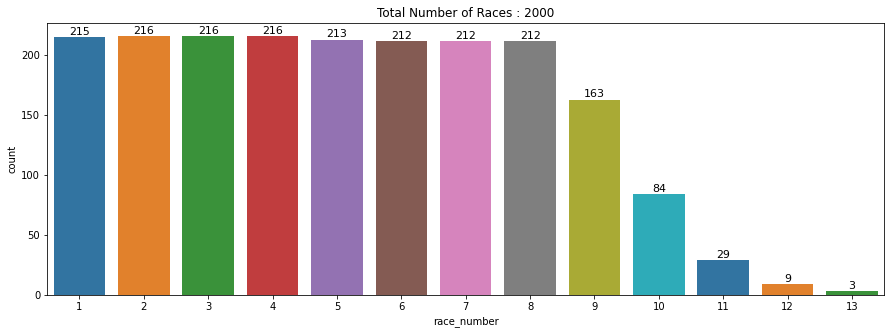

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.countplot('race_number',data = df_race, palette=sns.color_palette())
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = 'Total Number of Races : ' + str(sum(df_race['race_number'].value_counts()))
plt.title(title)

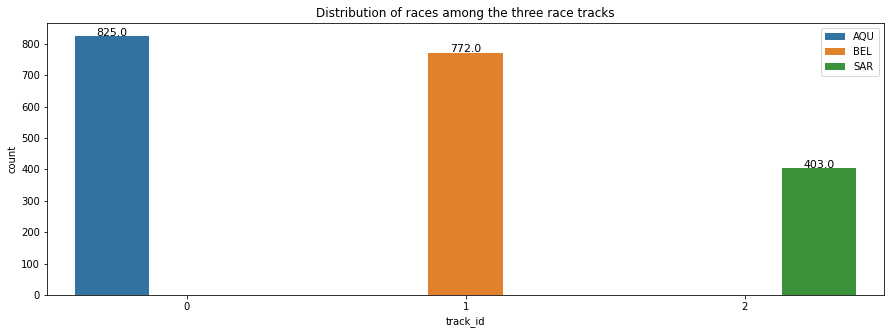

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.countplot('track_id',hue="track_id",data = df_race)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = 'Distribution of races among the three race tracks'
plt.legend(["AQU", "BEL", "SAR"])
plt.title(title);


In [ ]:
month = df_race['race_date'].dt.month

In [ ]:
month

0       1
1       1
2       1
3       1
4       1
       ..
1995    9
1996    9
1997    9
1998    9
1999    9
Name: race_date, Length: 2000, dtype: int64

In [ ]:
temp_df = df_race

In [ ]:
temp_df["month"] = df_race['race_date'].dt.month
temp_df["year"] = df_race['race_date'].dt.year

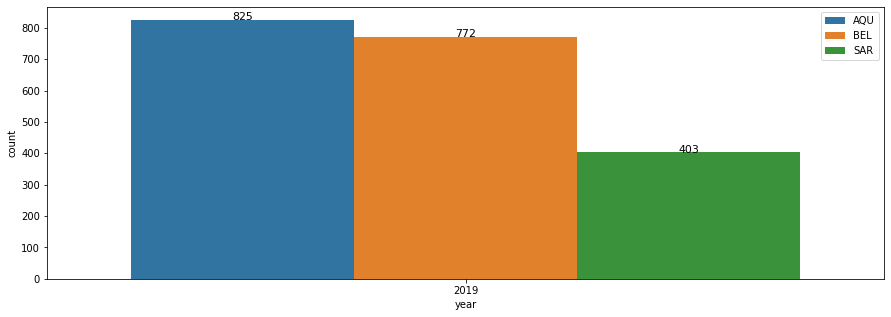

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x ='year', hue="track_id", data = temp_df)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(["AQU", "BEL", "SAR"])


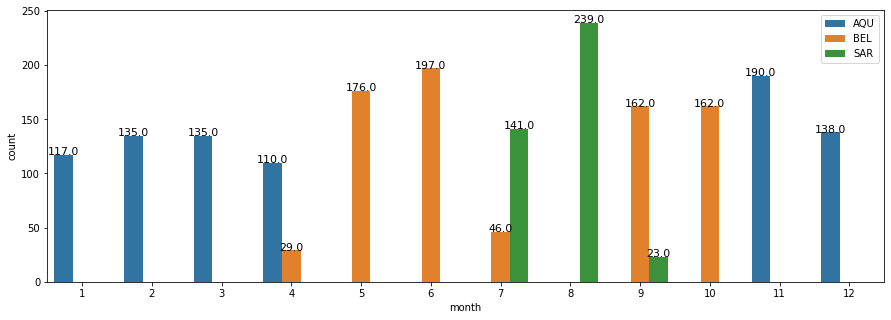

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x ='month', hue="track_id", data = temp_df)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(["AQU", "BEL", "SAR"])

In [ ]:
################## RACE NUMBER ######################

In [ ]:
pt = []
for i in df_start_race['post_time']:
    i = str(i.time())
    pt.append((i[0:2],i[3:5]))
hrs = [ i[0] + ':30 - ' +str(int(i[0]) + 1) if int(i[1]) > 30 else i[0] + ' - ' + i[0] + ':30' for i in pt]
df_start_race['Hours'] = hrs

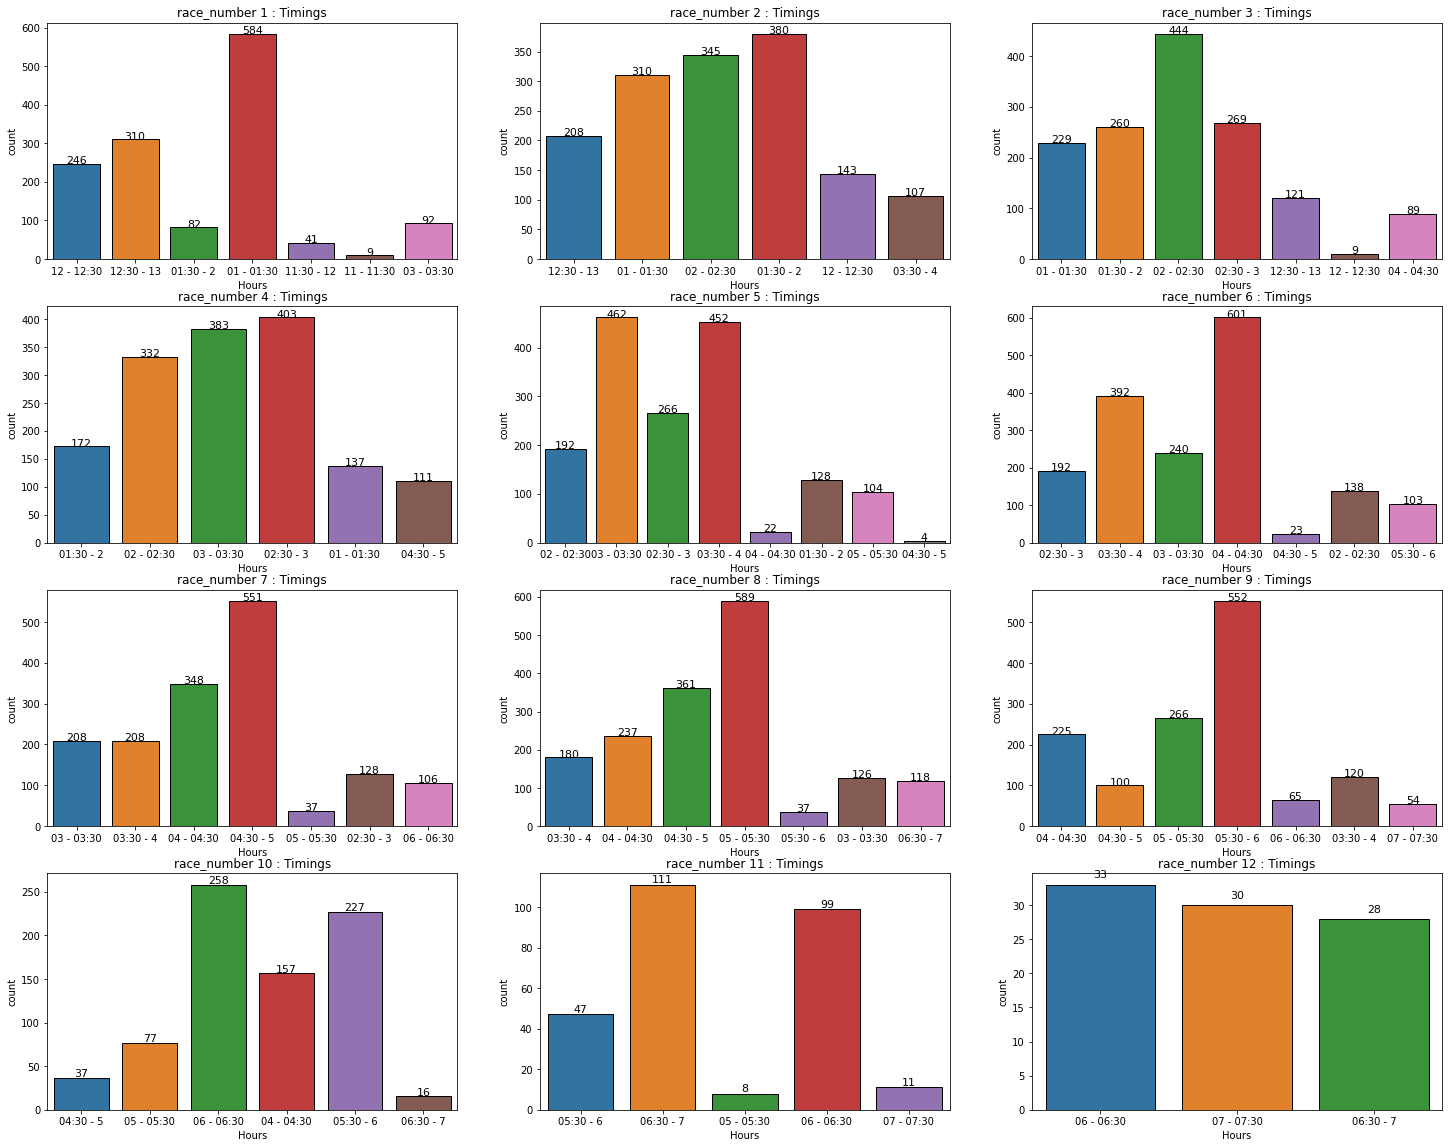

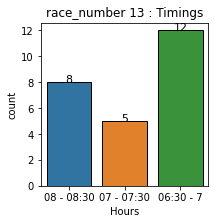

In [ ]:
fig = plt.subplots(nrows = 4,ncols = 3,figsize = (25,20))
for i in range(1,13):
    plt.subplot(4,3,i)
    ax = sns.countplot('Hours', data = df_start_race[df_start_race['race_number'] == i],edgecolor = 'black');
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 1, rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title('race_number ' + str(i) + ' : Timings');

fig = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3))
plt.subplot(1,1,1)
ax = sns.countplot('Hours', data = df_start_race[df_start_race['race_number'] == 13],edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title('race_number ' + str(13) + ' : Timings');

In [ ]:
temp_df2 = df_start_race.copy()
temp_df2["month"] = df_start_race['race_date'].dt.month

In [ ]:
df_filt = temp_df2[(temp_df2["month"] < 5) | (temp_df2["month"] > 10)]
set(df_filt["program_number"])

{'1  ',
 '10 ',
 '11 ',
 '12 ',
 '13 ',
 '14 ',
 '15 ',
 '16 ',
 '1A ',
 '2  ',
 '2B ',
 '3  ',
 '4  ',
 '5  ',
 '6  ',
 '7  ',
 '8  ',
 '9  '}

In [ ]:
temp_df2 = temp_df2.groupby(['month', 'program_number'])

temp_df2.first()

track_id  race_date  race_number  weight_carried  \
month program_number                                                     
1     1                      0 2019-01-01            1             123   
      10                     0 2019-01-01            6             120   
      11                     0 2019-01-01            9             120   
      12                     0 2019-01-25            9             122   
      13                     0 2019-01-26            7             117   
...                        ...        ...          ...             ...   
12    5                      0 2019-12-01            1             122   
      6                      0 2019-12-01            1             122   
      7                      0 2019-12-01            1             119   
      8                      0 2019-12-01            1             122   
      9                      0 2019-12-01            1             122   

                      jockey  odds  position  distance_id  course_type  \
month program_number                                                     
1     1                   42   130         2          650            0   
      10                  50   780         4          600            0   
      11                 139  3000         4          600            0   
      12                 119   195         2          550            0   
      13                 140   370        10          800            0   
...                      ...   ...       ...          ...          ...   
12    5                   64  2775         5          650            0   
      6                   77   110         2          650            0   
      7                   18  1540         7          650            0   
      8                   79  1330         4          650            0   
      9                  140   355         3          650            0   

                      track_condition  run_up_distance  race_type  purse  \
month program_number                                                       
1     1                             3               36          1  80000   
      10                            3               48          3  46000   
      11                            2               48          2  25000   
      12                            2               51          2  28000   
      13                            1               54          2  28000   
...                               ...              ...        ...    ...   
12    5                             1               54          3  30000   
      6                             1               54          3  30000   
      7                             1               54          3  30000   
      8                             1               54          3  30000   
      9                             1               54          3  30000   

                               post_time       Hours  
month program_number                                  
1     1              2019-01-01 12:20:00  12 - 12:30  
      10             2019-01-01 02:51:00   02:30 - 3  
      11             2019-01-01 04:20:00  04 - 04:30  
      12             2019-01-25 04:29:00  04 - 04:30  
      13             2019-01-26 03:23:00  03 - 03:30  
...                                  ...         ...  
12    5              2019-12-01 12:21:00  12 - 12:30  
      6              2019-12-01 12:21:00  12 - 12:30  
      7              2019-12-01 12:21:00  12 - 12:30  
      8              2019-12-01 12:21:00  12 - 12:30  
      9              2019-12-01 12:21:00  12 - 12:30  

[203 rows x 15 columns]

In [ ]:
# plt.figure(figsize = (15,5))
# ax = sns.countplot(x ='month', hue="program_number", data = temp_df)
# for rect in ax.patches:
#     ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)


In [ ]:
temp_df = df_race.groupby(['month', 'race_number'])
temp_df.first()

track_id  race_date  distance_id  course_type  \
month race_number                                                  
1     1                   0 2019-01-01          650            0   
      2                   0 2019-01-01          600            0   
      3                   0 2019-01-01          550            0   
      4                   0 2019-01-01          900            0   
      5                   0 2019-01-01          700            0   
...                     ...        ...          ...          ...   
12    6                   0 2019-12-05          600            0   
      7                   0 2019-12-05          800            0   
      8                   0 2019-12-05          800            0   
      9                   0 2019-12-05          600            0   
      10                  0 2019-12-06          600            0   

                   track_condition  run_up_distance  race_type  purse  \
month race_number                                                       
1     1                          3               36          1  80000   
      2                          3               48          3  41000   
      3                          3               54          3  35000   
      4                          3              101          1  80000   
      5                          3               60          0  64000   
...                            ...              ...        ...    ...   
12    6                          2               36          4  62000   
      7                          2               54          9  55000   
      8                          2               54          0  66000   
      9                          2               36          4  62000   
      10                         1               48          3  33000   

                            post_time  year  
month race_number                            
1     1           2019-01-01 12:20:00  2019  
      2           2019-01-01 12:50:00  2019  
      3           2019-01-01 01:21:00  2019  
      4           2019-01-01 01:50:00  2019  
      5           2019-01-01 02:20:00  2019  
...                               ...   ...  
12    6           2019-12-05 02:45:00  2019  
      7           2019-12-05 03:15:00  2019  
      8           2019-12-05 03:45:00  2019  
      9           2019-12-05 04:14:00  2019  
      10          2019-12-06 04:17:00  2019  

[136 rows x 10 columns]

In [ ]:
def count_plot(month):
  df_month = df_race[df_race['month'] == month]
  palette = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
  }
  ax=sns.countplot(x ='race_number', hue="track_id", palette=palette, data = df_month)
  for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)

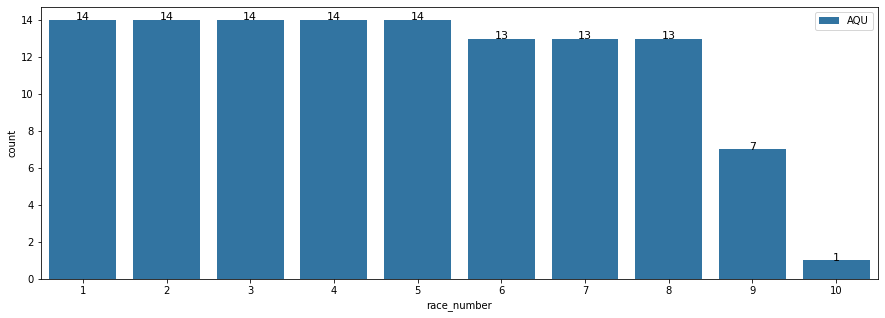

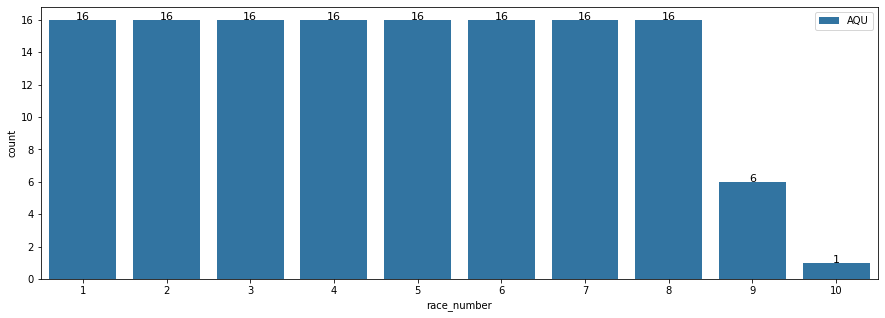

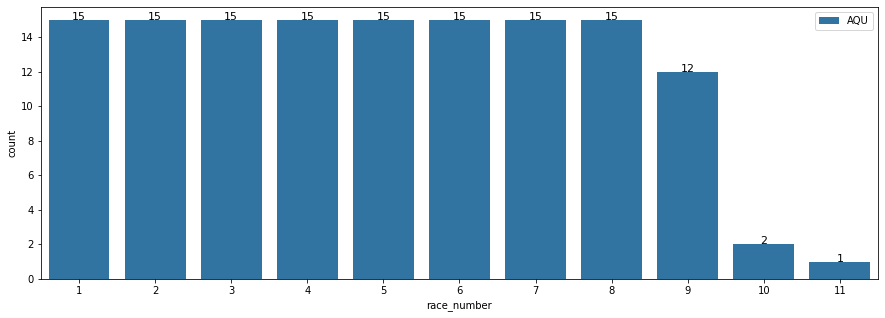

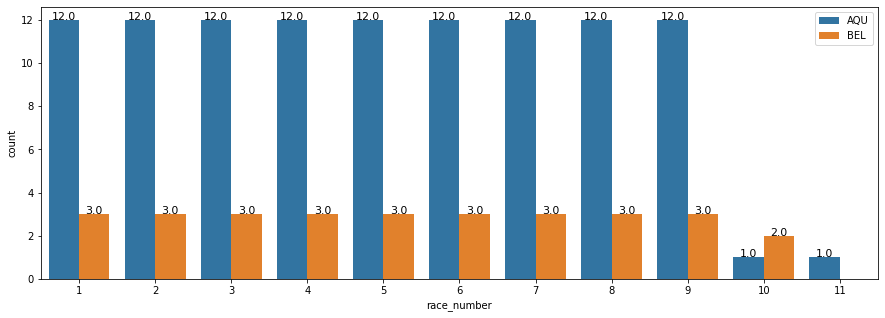

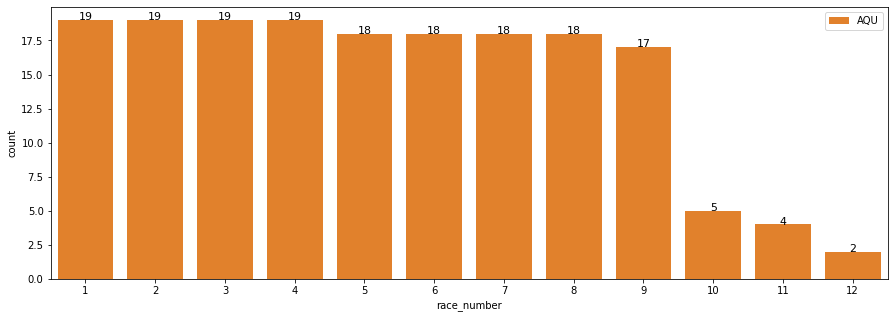

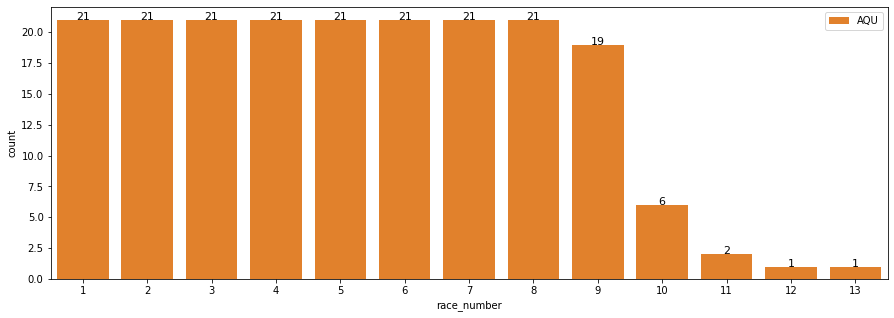

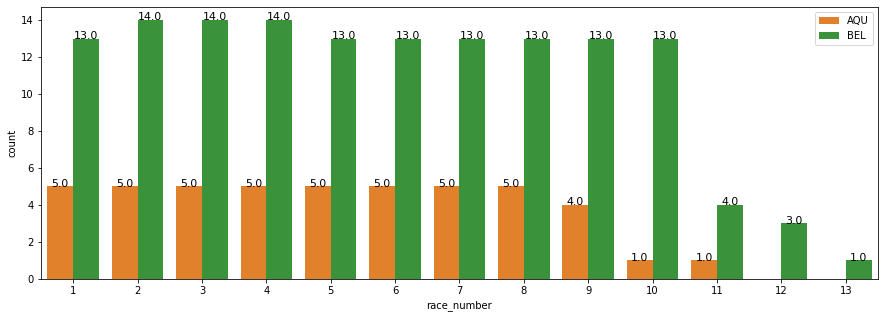

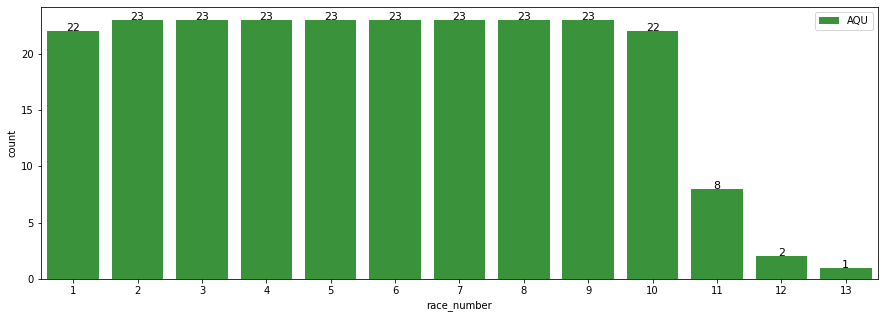

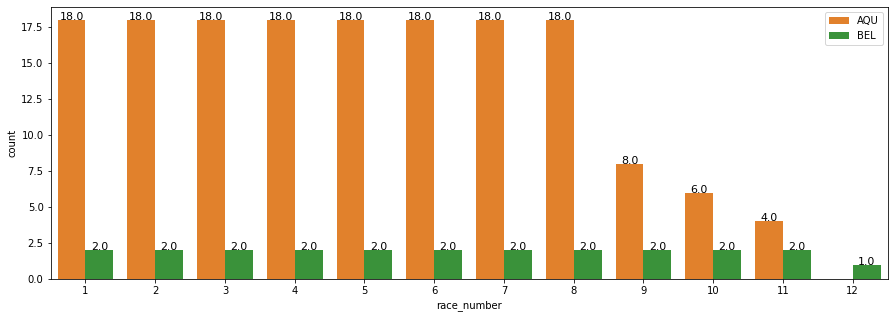

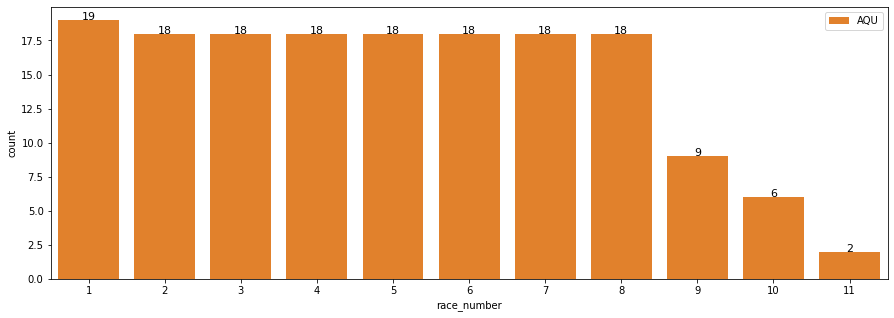

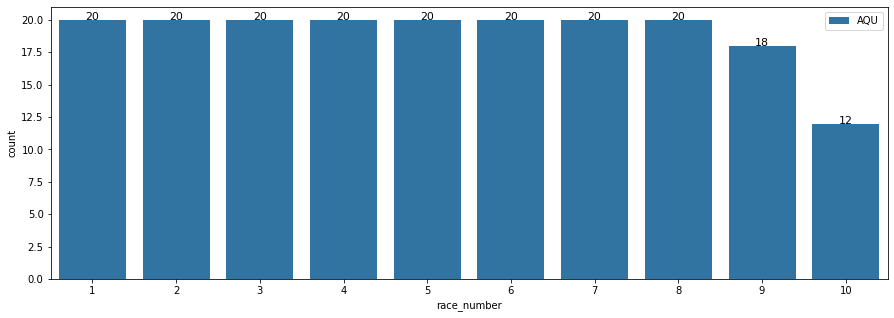

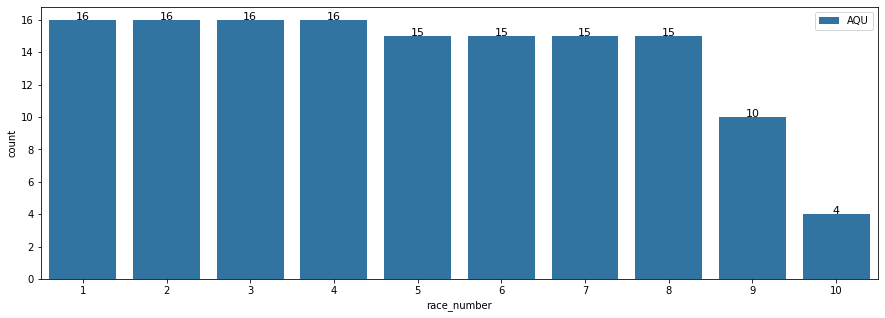

In [ ]:
for i in range (1, 13):
  plt.figure(figsize = (15,5))
  ax=count_plot(i)
  plt.legend(["AQU", "BEL", "SAR"])

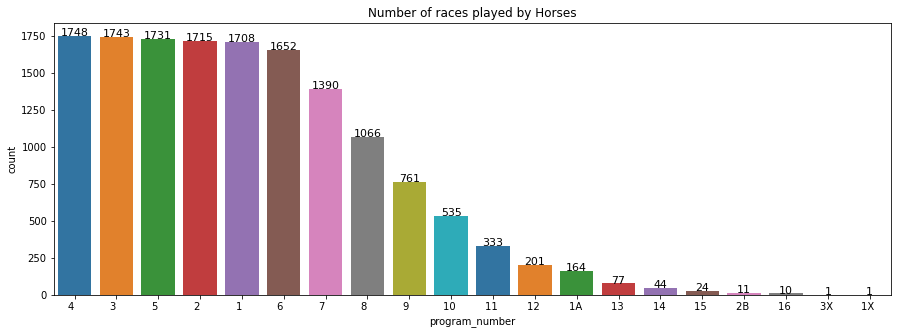

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.countplot(df_start["program_number"],data = df_start, palette=sns.color_palette(), order = df_start['program_number'].value_counts().index)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title('Number of races played by Horses');

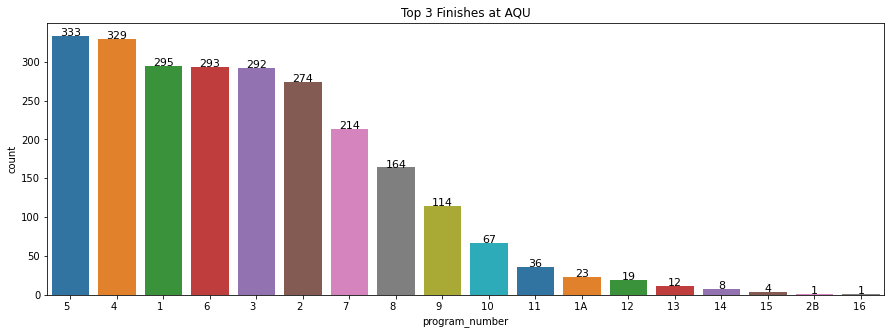

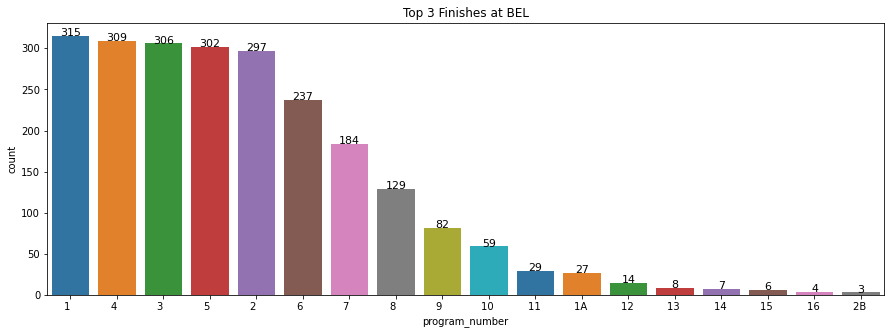

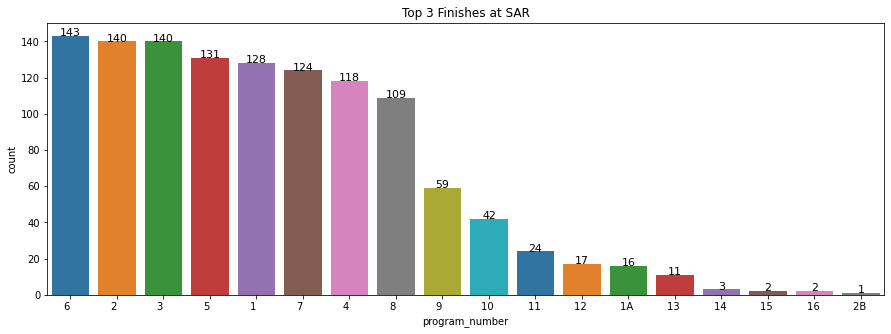

In [ ]:
tracks=["AQU", "BEL", "SAR"]
for i in range(3):
  plt.figure(figsize = (15,5))
  df=df_start[(df_start['position'] <= 3) & (df_start['track_id'] == i)]
  ax = sns.countplot("program_number", data =df , palette=sns.color_palette(), order = df['program_number'].value_counts().index);
  for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
  plt.title('Top 3 Finishes at '+ tracks[i]);

In [ ]:
# We see that the horses having highest performance(close competition) are same in all the three tracks-{1,2,3,4,5,6,7,8}.
# So, we can conclude that these horses can run in different conditions and still perform comparatively good.

In [ ]:
temp_start=df_start

In [ ]:
def categorize(row):
  if row['position'] > 1:
    return 0
  else:
    return 1

In [ ]:
temp_start['won'] = temp_start.apply(lambda row: categorize(row), axis=1)

In [ ]:
temp_start = temp_start.groupby(['jockey','won']).agg(['count']).reset_index().iloc[:,:3]
temp_start.columns = ['jockey','won','count']
temp_start = temp_start.sort_values(['won', 'count'],ascending = [False, False])
temp_start

,jockey,won,count
164,119,1,214
130,96,1,206
141,103,1,161
88,66,1,151
128,95,1,136
...,...,...,...
218,160,0,1
224,163,0,1
235,171,0,1
236,172,0,1


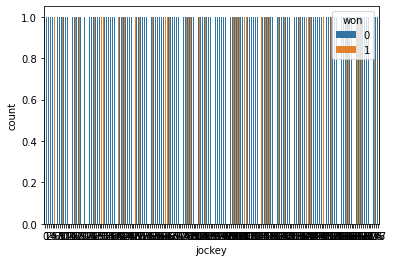

In [ ]:
# Since we are dealing with large number of jockeys, we use a more powerful tool for visualization and also consider the string values of jockey otherwise which we get graphs like these
ax = sns.countplot(x ='jockey', hue='won', data =temp_start)

In [ ]:
fig = px.histogram(temp_start, x='jockey', y="count", color="won")
fig.show()

In [ ]:
le = le_jockey
temp_start["jockey"]=le.inverse_transform(temp_start["jockey"])
temp_start

,jockey,won,count
164,Manuel Franco,1,214
130,Jose Lezcano,1,206
141,Junior Alvarado,1,161
88,Irad Ortiz Jr.,1,151
128,Jose L. Ortiz,1,136
...,...,...,...
218,Tammi Piermarini,0,1
224,Tony Piccone,0,1
235,Vince Halliday,0,1
236,Virginia Tormey,0,1


In [ ]:
fig = px.histogram(temp_start, x='jockey', y="count", color="won")
fig.show()

In [ ]:
print(temp_start.shape)
topj_df = temp_start[temp_start['count']>=5]
topj_df = topj_df[temp_start['won']==1]
print(topj_df.shape)

(243, 3)
(31, 3)


In [ ]:
fig = px.histogram(topj_df, x='jockey', y="count", color="won")
fig.show()

In [ ]:
jockeys_won = temp_start[temp_start['won']==1]['jockey'].unique().tolist()

In [ ]:
print(temp_start.shape)
temp_start = temp_start[temp_start['jockey'].isin(jockeys_won)]
print(temp_start.shape)

(243, 3)
(132, 3)


In [ ]:
fig = px.histogram(temp_start, x='jockey', y="count", color="won", color_discrete_sequence=[
                 px.colors.qualitative.T10[0],
                 px.colors.qualitative.T10[1]])
fig.show()

In [ ]:
fig = px.histogram(temp_start, x='jockey', y="count", color="won",barnorm='percent', color_discrete_sequence=[
                 px.colors.qualitative.T10[0],
                 px.colors.qualitative.T10[1]])
fig.update_layout(title_text="normalized")
fig.show()

In [ ]:
temp_start = df_start.copy()
temp_start = temp_start.groupby(["program_number",'won']).agg(['count']).reset_index().iloc[:,:3]
temp_start.columns = ["program_number",'won','count']

In [ ]:
fig = px.histogram(temp_start, x="program_number", y="count", color="won", color_discrete_sequence=[
                 px.colors.qualitative.T10[0],
                 px.colors.qualitative.T10[1]]).update_xaxes(categoryorder='total descending') # add only this line

fig.show()

In [ ]:
fig = px.histogram(temp_start, x="program_number", y="count", color="won",barnorm='percent', color_discrete_sequence=[
                 px.colors.qualitative.T10[0],
                 px.colors.qualitative.T10[1]])
fig.update_layout(title_text="normalized")
fig.show()

In [ ]:
df_start_race

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,Hours
0,0,2019-01-01,1,2,120,103,295,3,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30
1,0,2019-01-01,1,3,118,96,180,4,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30
2,0,2019-01-01,1,4,123,83,1280,5,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30
3,0,2019-01-01,1,5,118,119,1150,1,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30
4,0,2019-01-01,1,1,123,42,130,2,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,2,2019-09-02,11,3,119,119,1470,2,700,0,5,32,3,40000,2019-09-02 06:14:00,06 - 06:30
14911,2,2019-09-02,11,4,119,96,1070,5,700,0,5,32,3,40000,2019-09-02 06:14:00,06 - 06:30
14912,2,2019-09-02,11,6,119,50,1130,10,700,0,5,32,3,40000,2019-09-02 06:14:00,06 - 06:30
14913,2,2019-09-02,11,7,119,66,460,7,700,0,5,32,3,40000,2019-09-02 06:14:00,06 - 06:30


In [ ]:
def categorize(row):
  if row['position'] > 1:
    return 0
  else:
    return 1

In [ ]:
df_start_race['won'] = df_start_race.apply(lambda row: categorize(row), axis=1)
df_start_race

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,Hours,won
0,0,2019-01-01,1,2,120,103,295,3,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30,0
1,0,2019-01-01,1,3,118,96,180,4,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30,0
2,0,2019-01-01,1,4,123,83,1280,5,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30,0
3,0,2019-01-01,1,5,118,119,1150,1,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30,1
4,0,2019-01-01,1,1,123,42,130,2,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,2,2019-09-02,11,3,119,119,1470,2,700,0,5,32,3,40000,2019-09-02 06:14:00,06 - 06:30,0
14911,2,2019-09-02,11,4,119,96,1070,5,700,0,5,32,3,40000,2019-09-02 06:14:00,06 - 06:30,0
14912,2,2019-09-02,11,6,119,50,1130,10,700,0,5,32,3,40000,2019-09-02 06:14:00,06 - 06:30,0
14913,2,2019-09-02,11,7,119,66,460,7,700,0,5,32,3,40000,2019-09-02 06:14:00,06 - 06:30,0


**VISUALIZING THE PERFORMANCE OF HORSES IN VARIOUS RACES**

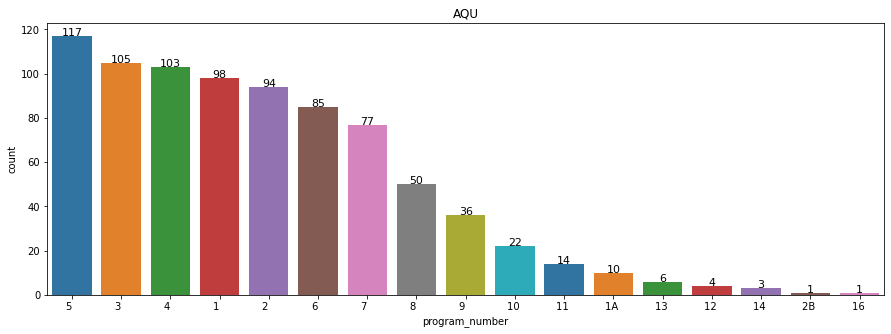

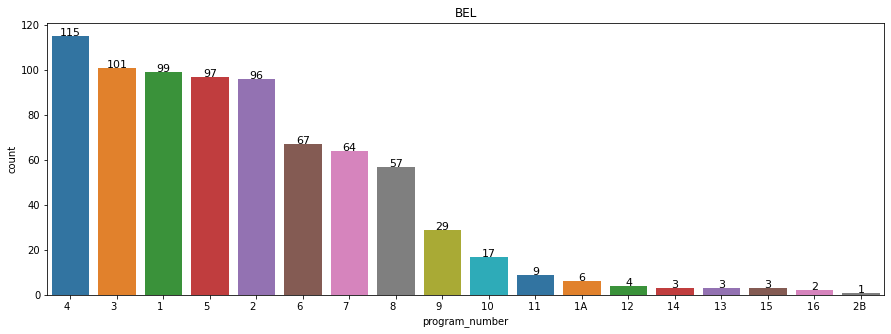

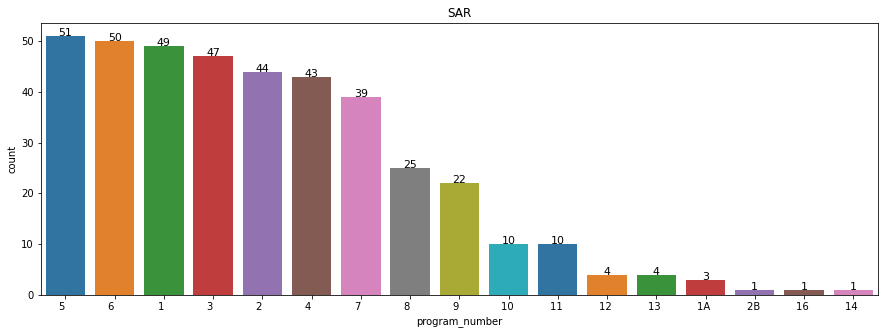

In [ ]:
tracks=["AQU", "BEL", "SAR"]
for i in range(3):
  plt.figure(figsize = (15,5))
  df=df_start_race[(df_start_race['track_id'] == i) & (df_start_race['won'] == 1)]
  if(len(df)==0):
    print("No juvenile race at", tracks[i])
  else:
    ax = sns.countplot("program_number", data =df , palette=sns.color_palette(), order = df['program_number'].value_counts().index);
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title(tracks[i])

In [ ]:
# The above illustration shows all the races vs winning horses.
# Observation 1: Horse 5 performs the best when compared to all the horses on all 3 tracks. Thus we can assume that this horse has been
# trained well to perform on all the 3 tracks
# Observation 2: Horses 1, 2, 3, 4, 5, 6, 7, 8 have played a lot of races when compared to others and these are well trained for all the
# different tracks.

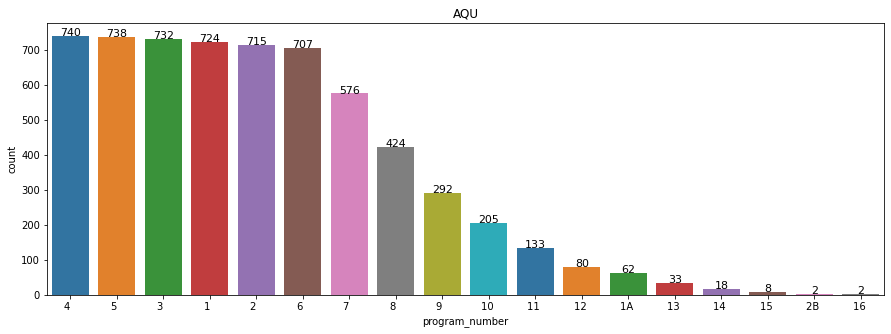

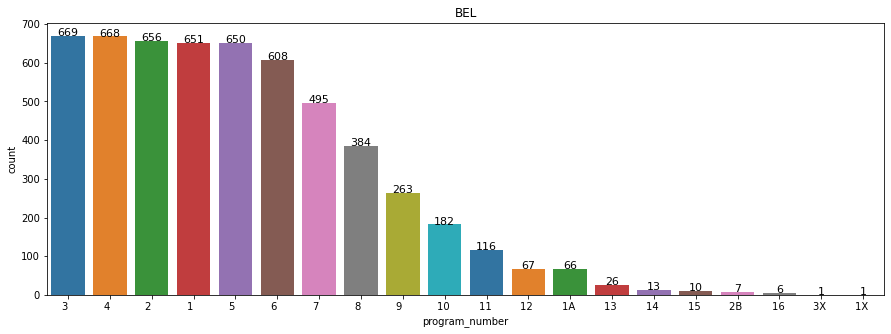

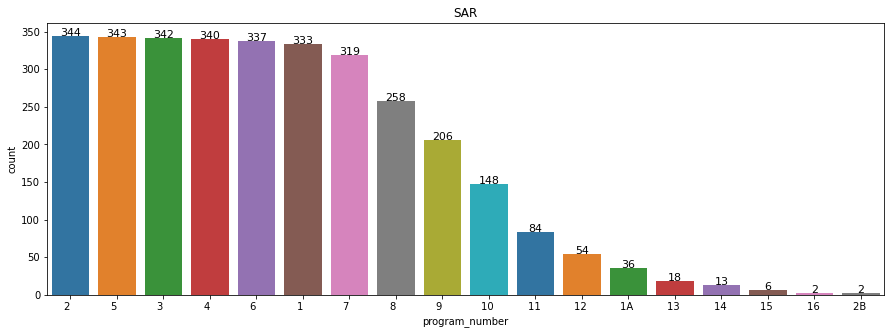

In [ ]:
tracks=["AQU", "BEL", "SAR"]
for i in range(3):
  plt.figure(figsize = (15,5))
  df=df_start_race[(df_start_race['track_id'] == i)]
  if(len(df)==0):
    print("No juvenile race at", tracks[i])
  else:
    ax = sns.countplot("program_number", data =df , palette=sns.color_palette(), order = df['program_number'].value_counts().index);
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title(tracks[i])

In [ ]:
# Thus we see that the ealier assumption - Horses 1,2,3,4,5,6,7,8 performed well in all the tracks is probably wrong because the data set
# is biased and we don't an equivalent number of races for all the horses. Thus, the performance of the other horses cannot be compared
# to the performance of these horses in the current scenario. Hence, we will only consider Horses 1,2,3,4,5,6,7,8 for future observations


CR:https://www.doubledtrailers.com/length-in-horse-racing/ <br>
5 Furlongs= 500 distance in this dataset <br>
Races <=5 Furlongs-> Juvenile horse races <br>
5 Furlongs < Races <= 6 Furlongs-> Classic sprint distance races <br>
6 Furlongs < Races <= 8 Furlongs-> Classic horse races <br>
8 Furlongs < Races <= 10 Furlongs-> Long distance races <br>

JUVENILE RACE ANALYSIS

In [ ]:
df=df_race[(df_race['distance_id'] < 501) & (df_race['track_id'] == 0)]
df

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,month,year
461,0,2019-04-17,1,450,0,1,76,4,100000,2019-04-17 01:30:00,4,2019
479,0,2019-04-19,1,450,0,1,72,4,100000,2019-04-19 01:30:00,4,2019


In [ ]:
df=df_race[(df_race['distance_id'] < 501) & (df_race['track_id'] == 1)]
df

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,month,year
854,1,2019-05-02,1,500,0,1,108,4,100000,2019-05-02 01:32:00,5,2019
856,1,2019-05-02,3,500,4,2,81,4,80000,2019-05-02 02:37:00,5,2019
889,1,2019-05-09,2,500,0,1,126,4,62000,2019-05-09 03:39:00,5,2019
901,1,2019-05-10,5,500,0,1,135,4,62000,2019-05-10 03:41:00,5,2019
965,1,2019-05-23,1,500,4,2,72,4,100000,2019-05-23 03:05:00,5,2019
983,1,2019-05-25,1,500,4,0,72,4,100000,2019-05-25 01:32:00,5,2019
1016,1,2019-05-30,4,500,0,2,135,4,62000,2019-05-30 04:39:00,5,2019
1022,1,2019-05-31,2,500,0,1,135,4,62000,2019-05-31 02:02:00,5,2019
1094,1,2019-06-12,3,500,0,1,144,4,80000,2019-06-12 02:34:00,6,2019
1114,1,2019-06-14,5,500,0,1,126,4,80000,2019-06-14 03:42:00,6,2019


In [ ]:
df=df_race[(df_race['distance_id'] < 501) & (df_race['track_id'] == 2)]
df

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,month,year


In [ ]:
df=df_start_race[(df_start_race['distance_id'] < 501) & (df_start_race['track_id'] == 0)]
len(df)

12

In [ ]:
df=df_start_race[(df_start_race['distance_id'] < 501) & (df_start_race['track_id'] == 1)]
len(df)

102

In [ ]:
df=df_start_race[(df_start_race['distance_id'] < 501) & (df_start_race['track_id'] == 2)]
len(df)

0

No juvenile race at SAR


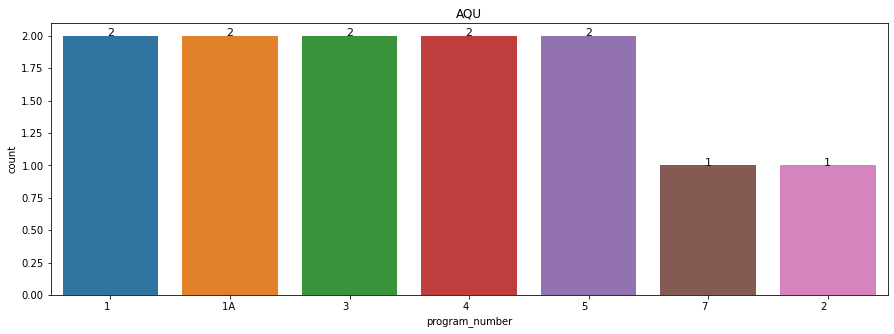

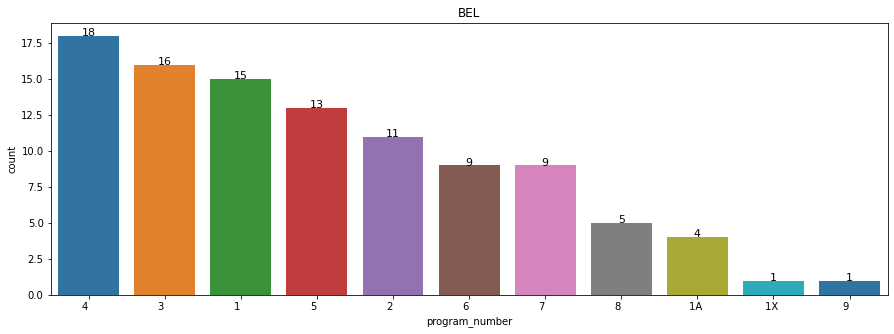

<Figure size 1080x360 with 0 Axes>

In [ ]:
tracks=["AQU", "BEL", "SAR"]
for i in range(3):
  plt.figure(figsize = (15,5))
  df=df_start_race[(df_start_race['distance_id'] < 501) & (df_start_race['track_id'] == i)]
  if(len(df)==0):
    print("No juvenile race at", tracks[i])
  else:
    ax = sns.countplot("program_number", data =df , palette=sns.color_palette(), order = df['program_number'].value_counts().index);
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title(tracks[i])

No juvenile race at SAR


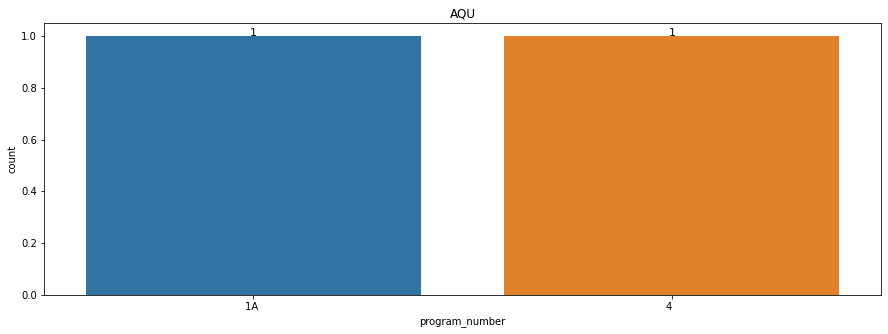

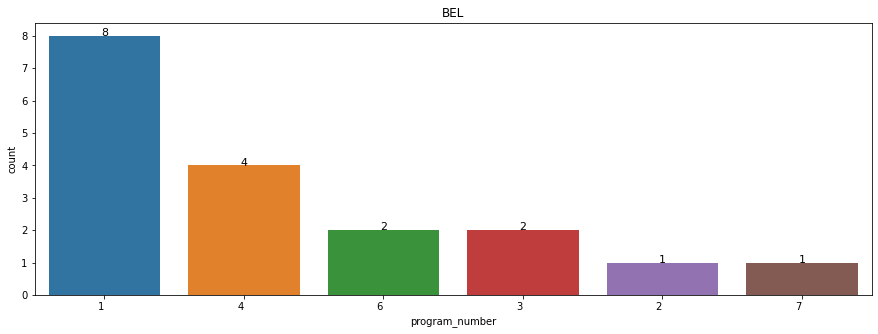

<Figure size 1080x360 with 0 Axes>

In [ ]:
tracks=["AQU", "BEL", "SAR"]
for i in range(3):
  plt.figure(figsize = (15,5))
  df=df_start_race[(df_start_race['distance_id'] < 501) & (df_start_race['track_id'] == i) & (df_start_race['won'] == 1)]
  if(len(df)==0):
    print("No juvenile race at", tracks[i])
  else:
    ax = sns.countplot("program_number", data =df , palette=sns.color_palette(), order = df['program_number'].value_counts().index);
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title(tracks[i])

In [ ]:
# We see some important features here 1,3,5,7

In [ ]:
# Observation 1
# Here, we can see a clear pattern.
# We know from the above analysis that there were 18 races in BEL track. In the graph above, we see that horse 4 had participated in all 18 races and had even won in 8 of these races.
# Also, there were only 2 juvenile races in the AQU track and horse 4 won one of those.
# So, we can intuitively say that horse 4 has more experience as compared to any other horse in juvenile races in BEL track. Thus, in future it might have high odds of winning such races.

# Observation 2
# We can also see that horses 1,3,4,5 horses have participated in majority of the juvenile races. Thus, we can conclude that these horses might be juvenile horses having an age of 2 or 3 years.

# Observation 3
# If we focus on horse 5, we see an interesting pattern. This horse has participated in 13/18 juvenile races in BEL, but has won none.
# Thus, we can assume that this horse has been poorly trained for juvenile races and that its odds of winning in such races might be low.


# Final:
# Our earlier observation about Horse 5 playing well on all different race types is wrong. Based on the above observations we can say that
# Horse 5 is well trained for the 6, 8, 10 furlong and is probably trying to win the juvenile races as well.

Classic sprint distance races

In [ ]:
df=df_race[(df_race['distance_id'] > 501) & (df_race['distance_id'] < 601) & (df_race['track_id'] == 0)]
df

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,month,year
1,0,2019-01-01,2,600,0,3,48,3,41000,2019-01-01 12:50:00,1,2019
2,0,2019-01-01,3,550,0,3,54,3,35000,2019-01-01 01:21:00,1,2019
5,0,2019-01-01,6,600,0,3,48,3,46000,2019-01-01 02:51:00,1,2019
8,0,2019-01-01,9,600,0,2,48,2,25000,2019-01-01 04:20:00,1,2019
11,0,2019-01-04,3,600,0,1,48,2,28000,2019-01-04 01:57:00,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
798,0,2019-12-28,8,600,0,1,40,0,64000,2019-12-28 03:48:00,12,2019
799,0,2019-12-28,9,600,0,1,40,3,33000,2019-12-28 04:15:00,12,2019
801,0,2019-12-29,2,600,0,1,52,1,64000,2019-12-29 12:58:00,12,2019
815,0,2019-12-30,7,600,0,5,45,0,82000,2019-12-30 03:28:00,12,2019


In [ ]:
df=df_race[(df_race['distance_id'] > 501) & (df_race['distance_id'] < 601) & (df_race['track_id'] == 1)]
df

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,month,year
825,1,2019-04-26,1,600,0,3,63,2,28000,2019-04-26 01:30:00,4,2019
826,1,2019-04-26,2,600,0,5,63,2,60000,2019-04-26 02:23:00,4,2019
832,1,2019-04-26,8,600,0,5,63,8,100000,2019-04-26 05:41:00,4,2019
834,1,2019-04-27,1,600,0,2,64,2,50000,2019-04-27 01:31:00,4,2019
837,1,2019-04-27,4,600,0,1,54,4,62000,2019-04-27 03:09:00,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
1570,1,2019-10-24,2,600,0,1,56,4,62000,2019-10-24 01:49:00,10,2019
1573,1,2019-10-24,5,600,1,2,138,0,77000,2019-10-24 03:36:00,10,2019
1585,1,2019-10-25,9,600,1,2,138,3,41000,2019-10-25 05:43:00,10,2019
1588,1,2019-10-26,3,600,0,1,68,10,36000,2019-10-26 01:53:00,10,2019


In [ ]:
df=df_race[(df_race['distance_id'] > 501) & (df_race['distance_id'] < 601) & (df_race['track_id'] == 2)]
df

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,month,year
1598,2,2019-07-11,2,550,4,0,85,4,90000,2019-07-11 01:36:00,7,2019
1601,2,2019-07-11,5,550,0,1,52,4,78000,2019-07-11 03:29:00,7,2019
1602,2,2019-07-11,6,550,4,2,85,0,80000,2019-07-11 04:03:00,7,2019
1604,2,2019-07-11,8,600,0,3,45,8,150000,2019-07-11 05:15:00,7,2019
1605,2,2019-07-11,9,550,4,6,85,8,100000,2019-07-11 05:48:00,7,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
1979,2,2019-09-01,3,600,0,1,54,2,45000,2019-09-01 01:40:00,9,2019
1980,2,2019-09-01,4,550,4,0,24,0,92000,2019-09-01 02:11:00,9,2019
1981,2,2019-09-01,5,550,0,1,45,3,52000,2019-09-01 02:44:00,9,2019
1986,2,2019-09-01,10,600,0,1,54,9,60000,2019-09-01 05:39:00,9,2019


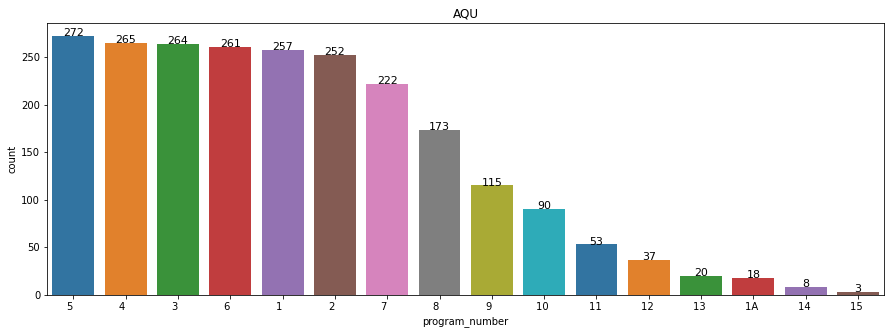

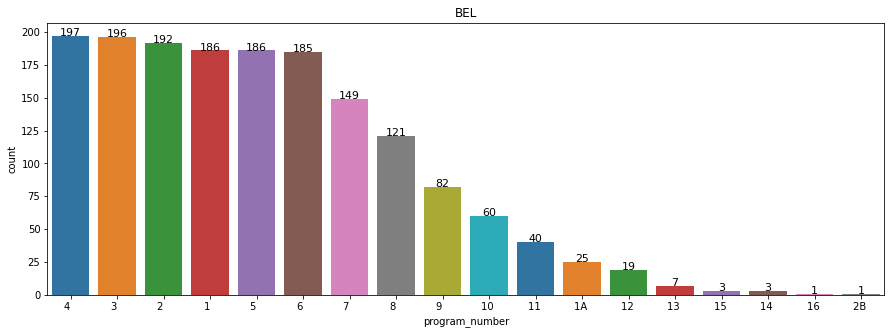

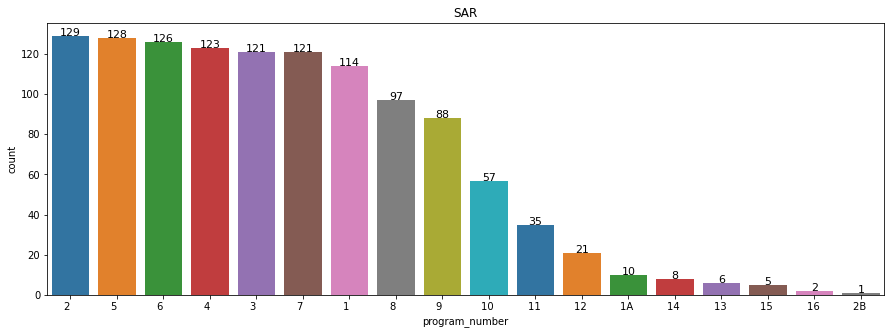

In [ ]:
tracks=["AQU", "BEL", "SAR"]
for i in range(3):
  plt.figure(figsize = (15,5))
  df=df_start_race[(df_start_race['distance_id'] > 501) & (df_start_race['distance_id'] < 601) & (df_start_race['track_id'] == i)]
  if(len(df)==0):
    print("No Classic sprint distance race at", tracks[i])
  else:
    ax = sns.countplot("program_number", data =df , palette=sns.color_palette(), order = df['program_number'].value_counts().index);
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title(tracks[i])

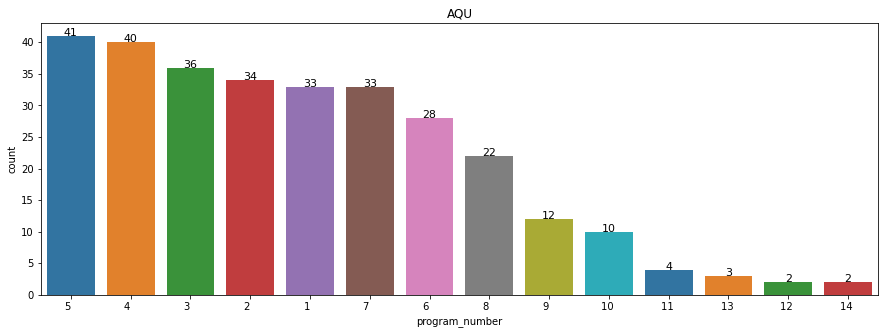

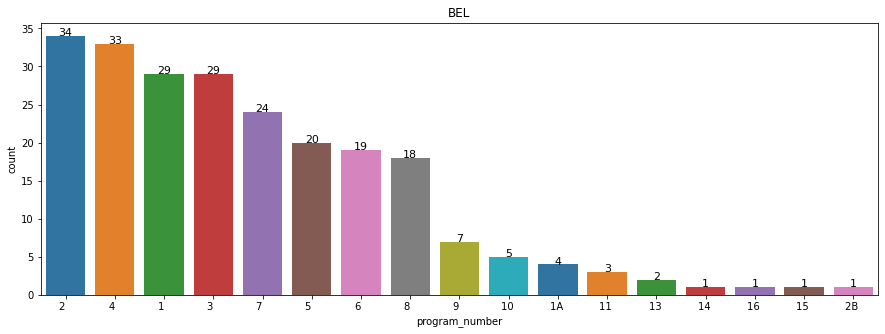

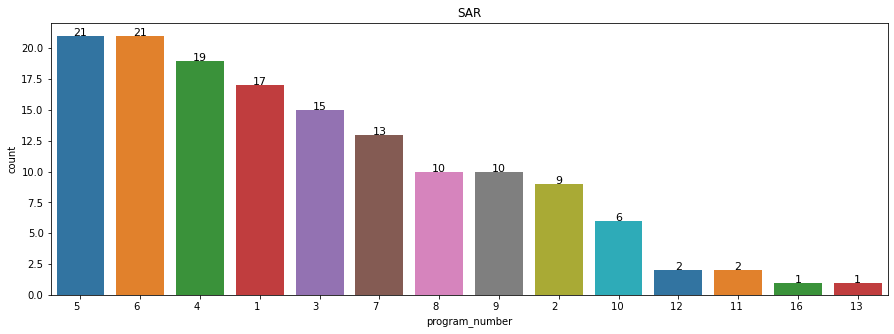

In [ ]:
tracks=["AQU", "BEL", "SAR"]
for i in range(3):
  plt.figure(figsize = (15,5))
  df=df_start_race[(df_start_race['distance_id'] > 501) & (df_start_race['distance_id'] < 601) & (df_start_race['track_id'] == i) & (df_start_race['won'] == 1)]
  if(len(df)==0):
    print("No Classic sprint distance race at", tracks[i])
  else:
    ax = sns.countplot("program_number", data =df , palette=sns.color_palette(), order = df['program_number'].value_counts().index);
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title(tracks[i])

In [ ]:
# Observation 1
# Horse 5 was not a juvenile horse but upon observation of the Classic horse race, we see that it's performance is comparatively better.
# This horse has performed well and it is trained for these 6 furlong races (Classic Sprint Race).
# Horse 5 has won consistently across all the 3 tracks.

Classic horse races

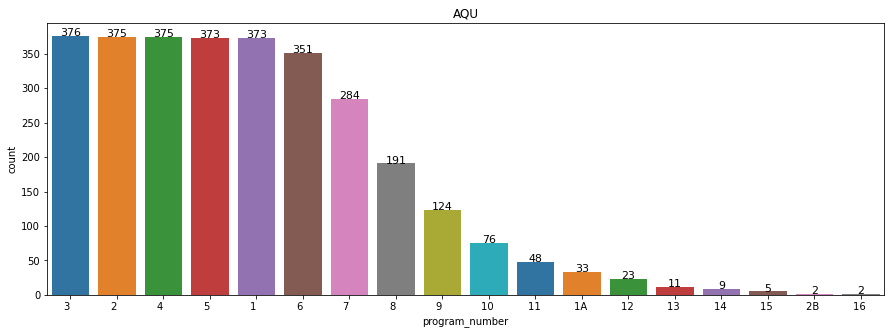

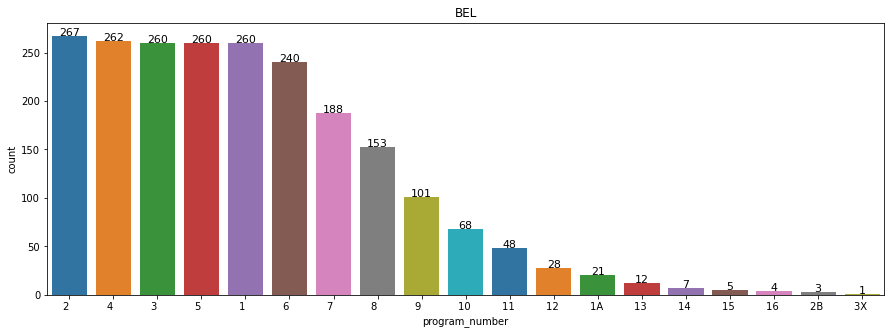

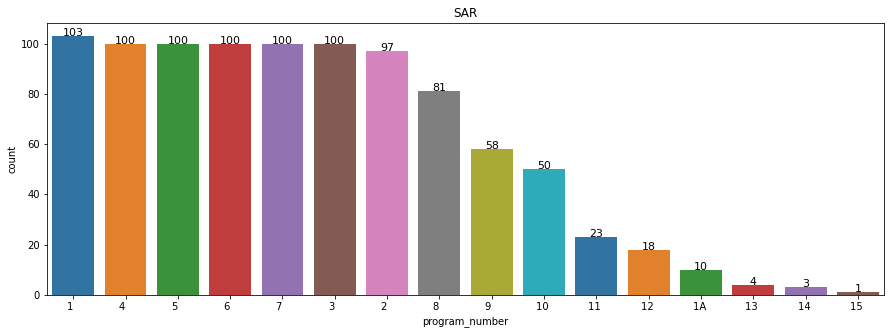

In [ ]:
tracks=["AQU", "BEL", "SAR"]
for i in range(3):
  plt.figure(figsize = (15,5))
  df=df_start_race[(df_start_race['distance_id'] > 601) & (df_start_race['distance_id'] < 801) & (df_start_race['track_id'] == i)]
  if(len(df)==0):
    print("No Classic horse race at", tracks[i])
  else:
    ax = sns.countplot("program_number", data =df , palette=sns.color_palette(), order = df['program_number'].value_counts().index);
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title(tracks[i])

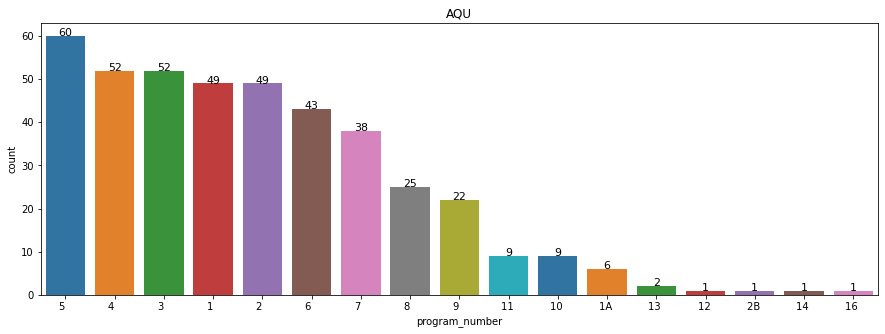

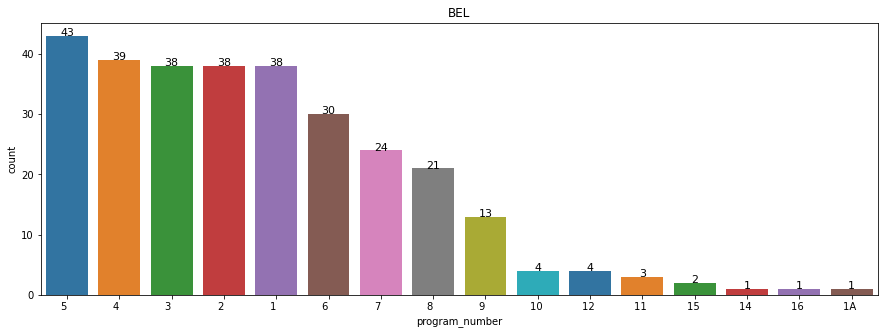

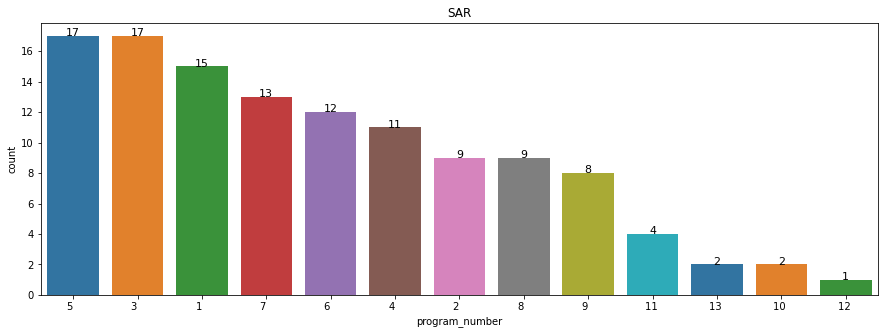

In [ ]:
tracks=["AQU", "BEL", "SAR"]
for i in range(3):
  plt.figure(figsize = (15,5))
  df=df_start_race[(df_start_race['distance_id'] > 601) & (df_start_race['distance_id'] < 801) & (df_start_race['track_id'] == i) & (df_start_race['won'] == 1)]
  if(len(df)==0):
    print("No Classic horse race at", tracks[i])
  else:
    ax = sns.countplot("program_number", data =df , palette=sns.color_palette(), order = df['program_number'].value_counts().index);
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title(tracks[i])

In [ ]:
# Across all 3 tracks, Horse no 5 and Horse no 3 have performed the best. These horses are trained for Classic races and have performed well
#

Long distance races

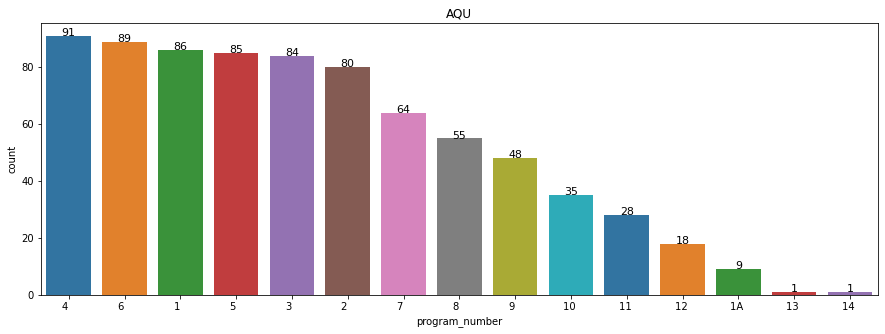

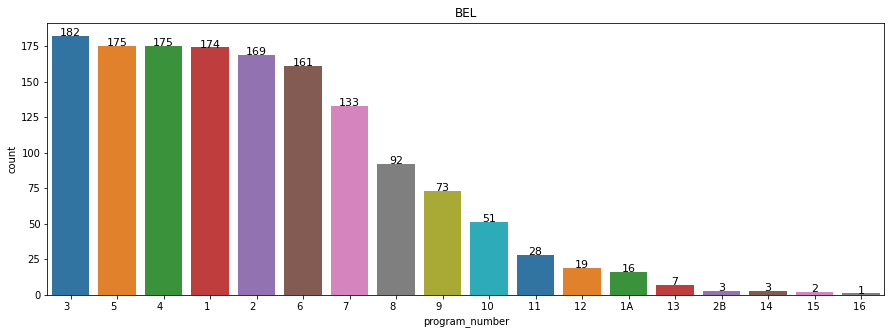

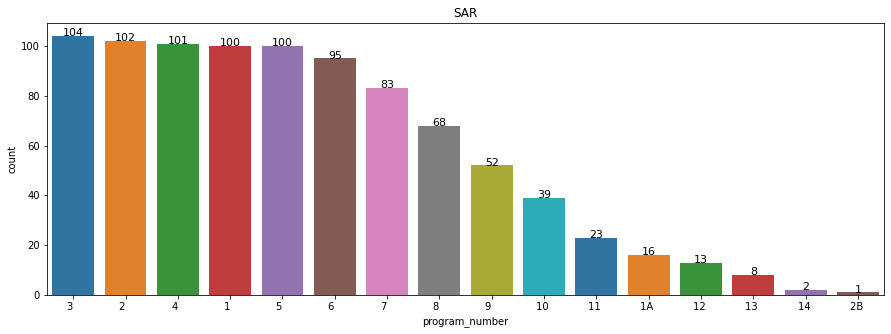

In [ ]:
tracks=["AQU", "BEL", "SAR"]
for i in range(3):
  plt.figure(figsize = (15,5))
  df=df_start_race[(df_start_race['distance_id'] > 801) & (df_start_race['distance_id'] < 1001) & (df_start_race['track_id'] == i)]
  if(len(df)==0):
    print("No Long distance races at", tracks[i])
  else:
    ax = sns.countplot("program_number", data =df , palette=sns.color_palette(), order = df['program_number'].value_counts().index);
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title(tracks[i])

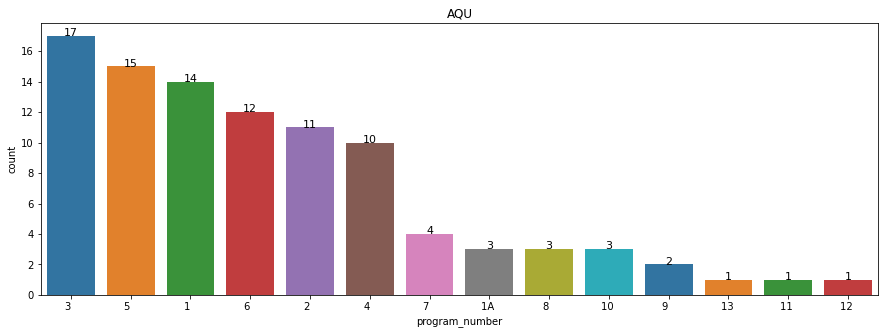

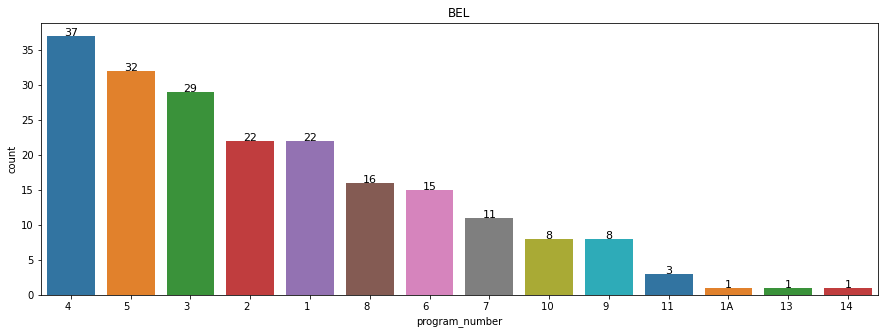

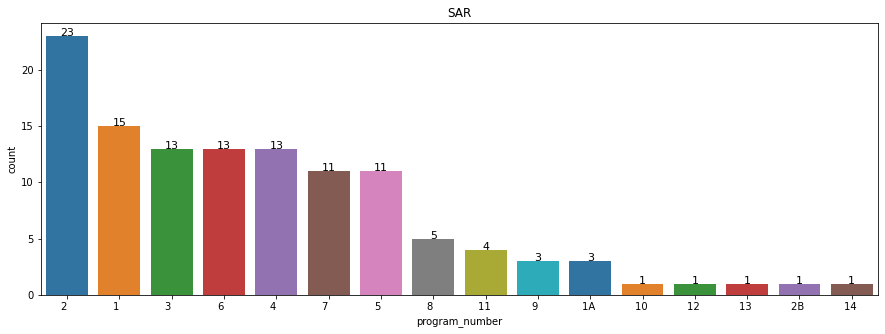

In [ ]:
tracks=["AQU", "BEL", "SAR"]
for i in range(3):
  plt.figure(figsize = (15,5))
  df=df_start_race[(df_start_race['distance_id'] > 801) & (df_start_race['distance_id'] < 1001) & (df_start_race['track_id'] == i) & (df_start_race['won'] == 1)]
  if(len(df)==0):
    print("No Long distance races at", tracks[i])
  else:
    ax = sns.countplot("program_number", data =df , palette=sns.color_palette(), order = df['program_number'].value_counts().index);
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title(tracks[i])

In [ ]:
df_start_race

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,Hours,won
0,0,2019-01-01,1,2,120,103,295,3,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30,0
1,0,2019-01-01,1,3,118,96,180,4,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30,0
2,0,2019-01-01,1,4,123,83,1280,5,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30,0
3,0,2019-01-01,1,5,118,119,1150,1,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30,1
4,0,2019-01-01,1,1,123,42,130,2,650,0,3,36,1,80000,2019-01-01 12:20:00,12 - 12:30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,2,2019-09-02,11,3,119,119,1470,2,700,0,5,32,3,40000,2019-09-02 06:14:00,06 - 06:30,0
14911,2,2019-09-02,11,4,119,96,1070,5,700,0,5,32,3,40000,2019-09-02 06:14:00,06 - 06:30,0
14912,2,2019-09-02,11,6,119,50,1130,10,700,0,5,32,3,40000,2019-09-02 06:14:00,06 - 06:30,0
14913,2,2019-09-02,11,7,119,66,460,7,700,0,5,32,3,40000,2019-09-02 06:14:00,06 - 06:30,0


In [ ]:
set(df_start_race['weight_carried'])

{110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 132,
 142,
 143,
 144,
 146,
 147,
 148,
 149,
 150,
 152,
 153,
 154,
 155,
 156,
 158,
 160}

In [ ]:
cormat = df_start_race.corr()
round(cormat,2)

,track_id,race_number,weight_carried,jockey,odds,position,distance_id,course_type,track_condition,run_up_distance,race_type,purse,won
track_id,1.00,0.08,0.07,0.06,-0.06,0.01,0.09,0.17,-0.13,0.14,0.08,0.15,-0.00
race_number,0.08,1.00,-0.06,0.01,0.08,0.15,0.04,0.10,-0.06,0.08,0.14,0.26,-0.04
weight_carried,0.07,-0.06,1.00,0.17,-0.13,-0.08,0.35,0.04,-0.03,-0.06,-0.04,0.03,0.05
jockey,0.06,0.01,0.17,1.00,-0.03,0.00,0.03,0.00,-0.00,-0.01,0.02,0.04,0.01
odds,-0.06,0.08,-0.13,-0.03,1.00,0.47,-0.02,0.06,-0.04,0.01,0.00,0.00,-0.20
position,0.01,0.15,-0.08,0.00,0.47,1.00,-0.00,0.13,-0.06,0.05,-0.01,0.02,-0.53
distance_id,0.09,0.04,0.35,0.03,-0.02,-0.00,1.00,0.13,-0.06,0.17,0.14,0.27,0.00
course_type,0.17,0.10,0.04,0.00,0.06,0.13,0.13,1.00,-0.27,0.44,0.04,0.02,-0.03
track_condition,-0.13,-0.06,-0.03,-0.00,-0.04,-0.06,-0.06,-0.27,1.00,-0.13,-0.03,-0.06,0.02
run_up_distance,0.14,0.08,-0.06,-0.01,0.01,0.05,0.17,0.44,-0.13,1.00,0.03,0.02,-0.01


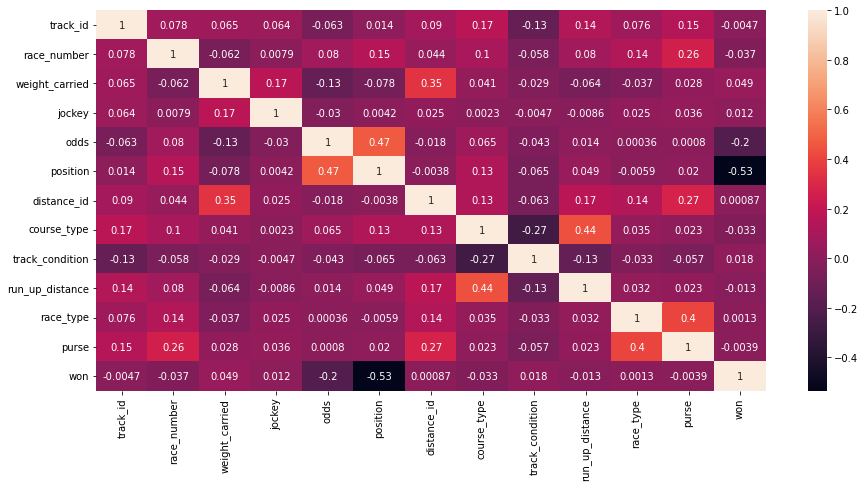

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(cormat, annot=True);

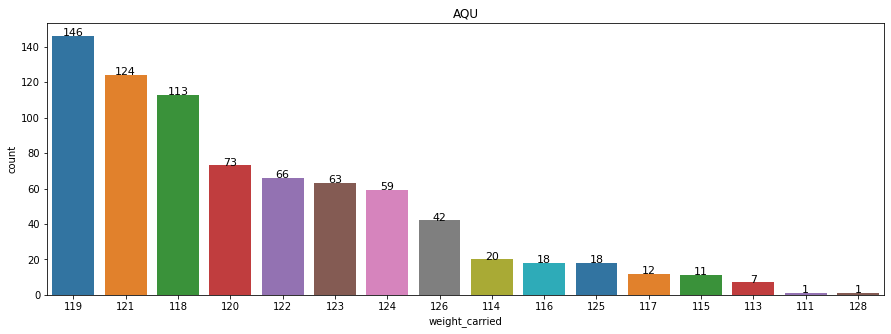

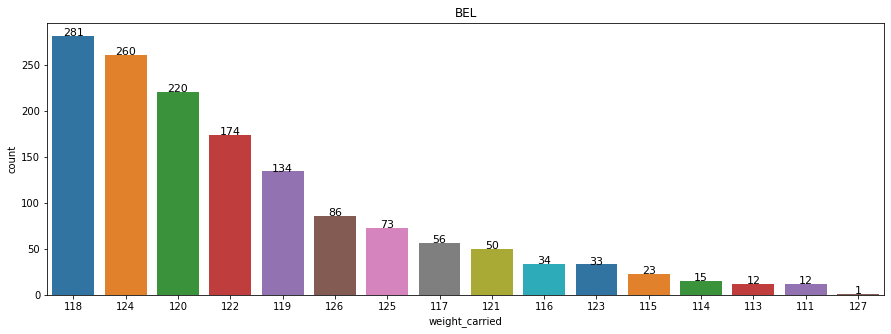

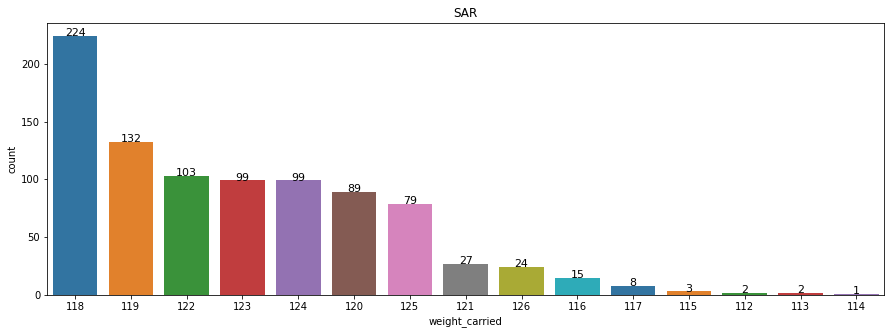

In [ ]:
tracks=["AQU", "BEL", "SAR"]
for i in range(3):
  plt.figure(figsize = (15,5))
  df=df_start_race[(df_start_race['distance_id'] > 801) & (df_start_race['distance_id'] < 1001) & (df_start_race['track_id'] == i)]
  if(len(df)==0):
    print("No Long distance races at", tracks[i])
  else:
    ax = sns.countplot("weight_carried", data =df , palette=sns.color_palette(), order = df['weight_carried'].value_counts().index);
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    plt.title(tracks[i])

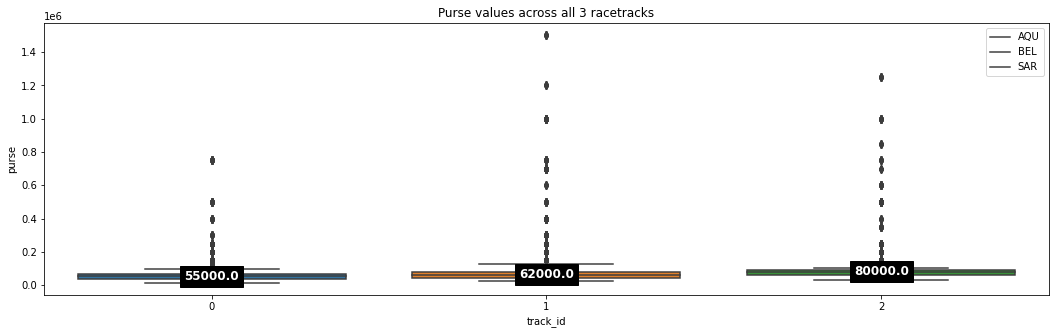

In [ ]:
plt.figure(figsize = (18,5))
ax = sns.boxplot(x = 'track_id',y = 'purse',data = df_start_race, palette=sns.color_palette());
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1)
    ax.text(cat,y,f'{y}',ha='center',va='center',fontweight='bold',size=12,color='white',bbox=dict(facecolor='#000000'))

plt.legend(["AQU", "BEL", "SAR"])
plt.title('Purse values across all 3 racetracks');

In [ ]:
df_start_race
x=df_start_race.groupby(['program_number', 'post_time'])
x.first()

track_id  race_date  race_number  \
program_number post_time                                               
1              2019-01-01 01:21:00         0 2019-01-01            3   
               2019-01-01 01:50:00         0 2019-01-01            4   
               2019-01-01 02:20:00         0 2019-01-01            5   
               2019-01-01 03:23:00         0 2019-01-01            7   
               2019-01-01 03:50:00         0 2019-01-01            8   
...                                      ...        ...          ...   
9              2019-12-30 02:30:00         0 2019-12-30            5   
               2019-12-30 03:59:00         0 2019-12-30            8   
               2019-12-31 02:35:00         0 2019-12-31            5   
               2019-12-31 03:04:00         0 2019-12-31            6   
               2019-12-31 04:05:00         0 2019-12-31            8   

                                    weight_carried  jockey  odds  position  \
program_number post_time                                                     
1              2019-01-01 01:21:00             120     103    75         2   
               2019-01-01 01:50:00             118      42   200         1   
               2019-01-01 02:20:00             118     140   100         3   
               2019-01-01 03:23:00             121     139   950         3   
               2019-01-01 03:50:00             118      96   540         6   
...                                            ...     ...   ...       ...   
9              2019-12-30 02:30:00             115     102  1740         9   
               2019-12-30 03:59:00             119      96   400         6   
               2019-12-31 02:35:00             123      85  4150         6   
               2019-12-31 03:04:00             120     140   810         5   
               2019-12-31 04:05:00             124     134  8175         8   

                                    distance_id  course_type  track_condition  \
program_number post_time                                                        
1              2019-01-01 01:21:00          550            0                3   
               2019-01-01 01:50:00          900            0                3   
               2019-01-01 02:20:00          700            0                3   
               2019-01-01 03:23:00          650            0                2   
               2019-01-01 03:50:00          800            0                2   
...                                         ...          ...              ...   
9              2019-12-30 02:30:00          650            0                5   
               2019-12-30 03:59:00          700            0                5   
               2019-12-31 02:35:00          800            0                5   
               2019-12-31 03:04:00          700            0                5   
               2019-12-31 04:05:00          600            0                5   

                                    run_up_distance  race_type   purse  \
program_number post_time                                                 
1              2019-01-01 01:21:00               54          3   35000   
               2019-01-01 01:50:00              101          1   80000   
               2019-01-01 02:20:00               60          0   64000   
               2019-01-01 03:23:00               36          1   67000   
               2019-01-01 03:50:00               54          8  150000   
...                                             ...        ...     ...   
9              2019-12-30 02:30:00               52          2   46000   
               2019-12-30 03:59:00               48          3   41000   
               2019-12-31 02:35:00               54          2   36000   
               2019-12-31 03:04:00               48          0   64000   
               2019-12-31 04:05:00               45          3   33000   

                                         Hours  won  
program_numbe

MODELS

In [ ]:
start_race_data

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,0,2019-01-01,1,2,120,103,295,3,650,0,3,36,1,80000,2019-01-01 12:20:00
1,0,2019-01-01,1,3,118,96,180,4,650,0,3,36,1,80000,2019-01-01 12:20:00
2,0,2019-01-01,1,4,123,83,1280,5,650,0,3,36,1,80000,2019-01-01 12:20:00
3,0,2019-01-01,1,5,118,119,1150,1,650,0,3,36,1,80000,2019-01-01 12:20:00
4,0,2019-01-01,1,1,123,42,130,2,650,0,3,36,1,80000,2019-01-01 12:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,2,2019-09-02,11,3,119,119,1470,2,700,0,5,32,3,40000,2019-09-02 06:14:00
14911,2,2019-09-02,11,4,119,96,1070,5,700,0,5,32,3,40000,2019-09-02 06:14:00
14912,2,2019-09-02,11,6,119,50,1130,10,700,0,5,32,3,40000,2019-09-02 06:14:00
14913,2,2019-09-02,11,7,119,66,460,7,700,0,5,32,3,40000,2019-09-02 06:14:00


In [ ]:
start_race_data['won'] = start_race_data['position'].apply(lambda x: x if x==1 else 0)

In [ ]:
start_race_data=label_encoder(start_race_data, ['program_number'])
start_race_data.info()

program_number {'1  ': 0, '10 ': 1, '11 ': 2, '12 ': 3, '13 ': 4, '14 ': 5, '15 ': 6, '16 ': 7, '1A ': 8, '1X ': 9, '2  ': 10, '2B ': 11, '3  ': 12, '3X ': 13, '4  ': 14, '5  ': 15, '6  ': 16, '7  ': 17, '8  ': 18, '9  ': 19}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14915 entries, 0 to 14914
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   track_id         14915 non-null  int64         
 1   race_date        14915 non-null  datetime64[ns]
 2   race_number      14915 non-null  int8          
 3   program_number   14915 non-null  int64         
 4   weight_carried   14915 non-null  int16         
 5   jockey           14915 non-null  int64         
 6   odds             14915 non-null  int16         
 7   position         14915 non-null  int8          
 8   distance_id      14915 non-null  int16         
 9   course_type      14915 non-null  int64         
 10  track_condition  14915 n

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


PREPARING X_TRAIN, Y_TRAIN, X_TEST, Y_TEST

In [ ]:
df_train, df_test = train_test_split(start_race_data, test_size=0.2, random_state=11)

In [ ]:
y_train=df_train["won"]

In [ ]:
x_train=df_train.copy()
x_train=x_train.drop("position", axis=1)
x_train=x_train.drop("race_date", axis=1)
x_train=x_train.drop("post_time", axis=1)
x_train=x_train.drop("won", axis=1)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [ ]:
y_test = df_test["won"]

In [ ]:
x_test=df_test.copy()
x_test=x_test.drop("position", axis=1)
x_test=x_test.drop("race_date", axis=1)
x_test=x_test.drop("post_time", axis=1)
x_test=x_test.drop("won", axis=1)
x_test = sc.transform(x_test)

LOGISTIC REGRESSION WITH COMPLETE DATASET

In [ ]:
model= LogisticRegression()


In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score_logistic_regression_complete_dataset = accuracy_score(y_pred, y_test)*100
print('LOGISTIC REGRESSION - Accuracy score on complete dataset: ', accuracy_score_logistic_regression_complete_dataset)

LOGISTIC REGRESSION - Accuracy score on complete dataset:  86.55715722427087


In [ ]:
f1_logistic_regression_complete_dataset = f1_score(y_test, y_pred)
print('LOGISTIC REGRESSION - F1 score on complete dataset:', f1_logistic_regression_complete_dataset)

LOGISTIC REGRESSION - F1 score on complete dataset: 0.0


PCA ON COMPLETE DATASET

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(x_train)

In [ ]:
pca.get_covariance()

array([[ 1.00008382e+00,  8.48662688e-02,  2.33117279e-03,
         6.85038353e-02,  6.41578531e-02, -6.25187795e-02,
         8.96104054e-02,  1.68575246e-01, -1.33134645e-01,
         1.41563809e-01,  7.46693948e-02,  1.54338274e-01],
       [ 8.48662688e-02,  1.00008382e+00, -1.53573896e-02,
        -6.25272351e-02,  6.99668955e-03,  8.53320081e-02,
         4.44539563e-02,  1.02622966e-01, -5.82018995e-02,
         8.22479052e-02,  1.47750928e-01,  2.61184353e-01],
       [ 2.33117279e-03, -1.53573896e-02,  1.00008382e+00,
         3.77892825e-03, -1.49363168e-02,  4.86543196e-03,
        -3.23470736e-03, -2.39104400e-02, -8.87701656e-04,
        -5.07814050e-03,  1.45985437e-02,  7.10654100e-03],
       [ 6.85038353e-02, -6.25272351e-02,  3.77892825e-03,
         1.00008382e+00,  1.70097826e-01, -1.35256142e-01,
         3.38681869e-01,  4.01802621e-02, -3.84212056e-02,
        -5.89598959e-02, -4.88428016e-02,  2.91685532e-02],
       [ 6.41578531e-02,  6.99668955e-03, -1.4936316

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.16506799, 0.12109264, 0.11598349, 0.08440219, 0.08354766,
       0.08187899, 0.07504204, 0.07037243, 0.0675386 , 0.05156052,
       0.04413347, 0.03937998])

In [ ]:
pca=PCA(n_components=2)
X_new=pca.fit_transform(x_train)

In [ ]:
model = LogisticRegression()
model.fit(X_new, y_train)

LogisticRegression()

In [ ]:
X_newt=pca.transform(x_test)
y_pred= model.predict(X_newt)

In [ ]:
accuracy_score_pca_complete_dataset = accuracy_score(y_pred, y_test)*100
print('PCA - Accuracy score on complete dataset: ', accuracy_score_pca_complete_dataset)

PCA - Accuracy score on complete dataset:  86.55715722427087


In [ ]:
f1_pca_complete_dataset = f1_score(y_test, y_pred)
print('LOGISTIC REGRESSION - F1 score on complete dataset:', f1_pca_complete_dataset)

LOGISTIC REGRESSION - F1 score on complete dataset: 0.0


DECISION TREE ON COMPLETE DATASET

We use 2 methods for performing Decision Tree Classifier on the data<br>
1) GINI Index<br>
2) Entropy

In [ ]:
model_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=5, min_samples_leaf=5)

model_gini.fit(x_train, y_train)

y_pred_gini = model_gini.predict(x_test)

accuracy_score_dt_gini_complete_dataset = accuracy_score(y_test,y_pred_gini)*100

print("DECISION TREE - Accuracy score using Gini Index on complete dataset: ", accuracy_score_dt_gini_complete_dataset)

DECISION TREE - Accuracy score using Gini Index on complete dataset:  85.81964465303386


In [ ]:
f1_dt_gini_complete_dataset = f1_score(y_test, y_pred_gini)
print('DECISION TREE - F1 score using Gini Index on complete dataset:', f1_dt_gini_complete_dataset)

DECISION TREE - F1 score using Gini Index on complete dataset: 0.1722113502935421


In [ ]:
model_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 6, min_samples_leaf = 5)
model_entropy.fit(x_train, y_train)

y_pred_entropy = model_entropy.predict(x_test)

accuracy_score_dt_entropy_complete_dataset = accuracy_score(y_test,y_pred_entropy)*100

print("DECISION TREE - Accuracy score using Entropy on complete dataset: ", accuracy_score_dt_entropy_complete_dataset)

DECISION TREE - Accuracy score using Entropy on complete dataset:  86.12135434126718


In [ ]:
f1_dt_entropy_complete_dataset = f1_score(y_test, y_pred_entropy)
print('DECISION TREE - F1 score using Entropy on complete dataset:', f1_dt_entropy_complete_dataset)

DECISION TREE - F1 score using Entropy on complete dataset: 0.11914893617021276


RANDOM FOREST CLASSIFIER ON COMPLETE DATASET

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy_score_rf_complete_dataset = accuracy_score(y_test, y_pred)*100

print("RANDOM FOREST - Accuracy score on complete dataset: ", accuracy_score_rf_complete_dataset)

RANDOM FOREST - Accuracy score on complete dataset:  86.08783104257459


In [ ]:
f1_score_rf_complete_dataset = f1_score(y_test, y_pred)

print('RANDOM FOREST - F1 score on complete dataset: ', f1_score_rf_complete_dataset)

RANDOM FOREST - F1 score on complete dataset:  0.12262156448202961


NEURAL NETWORK ON COMPLETE DATASET

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
N, D=x_train.shape

In [ ]:
model_tf=tf.keras.models.Sequential([tf.keras.layers.Dense(D, input_shape=(D,), activation='relu'), tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
y_train.value_counts()

0    10330
1     1602
Name: won, dtype: int64

In [ ]:
r = model_tf.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
373/373 [==============================] - 3s 7ms/step - loss: 0.5029 - accuracy: 0.7911 - val_loss: 0.4036 - val_accuracy: 0.8656
Epoch 2/10
373/373 [==============================] - 1s 2ms/step - loss: 0.3886 - accuracy: 0.8658 - val_loss: 0.3739 - val_accuracy: 0.8656
Epoch 3/10
373/373 [==============================] - 1s 2ms/step - loss: 0.3705 - accuracy: 0.8659 - val_loss: 0.3644 - val_accuracy: 0.8656
Epoch 4/10
373/373 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.8658 - val_loss: 0.3596 - val_accuracy: 0.8656
Epoch 5/10
373/373 [==============================] - 1s 2ms/step - loss: 0.3574 - accuracy: 0.8657 - val_loss: 0.3561 - val_accuracy: 0.8656
Epoch 6/10
373/373 [==============================] - 1s 2ms/step - loss: 0.3542 - accuracy: 0.8657 - val_loss: 0.3543 - val_accuracy: 0.8662
Epoch 7/10
373/373 [==============================] - 1s 2ms/step - loss: 0.3520 - accuracy: 0.8657 - val_loss: 0.3525 - val_accuracy: 0.8659
Epoch 

In [ ]:
model_tf.evaluate(x_train, y_train)

373/373 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8659


[0.34536540508270264, 0.865906834602356]

In [ ]:
model_tf.evaluate(x_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8659


[0.35019898414611816, 0.865906834602356]

In [ ]:
y_pred=model_tf.predict(x_test)

94/94 [==============================] - 0s 2ms/step


In [ ]:
for i in range(len(y_pred)):
  if (y_pred[i]<0.5):
    y_pred[i]=0
  else:
    y_pred[i]=1

In [ ]:
accuracy_score_nn_complete_dataset = accuracy_score(y_test, y_pred)*100

print('NEURAL NETWORK - Accuracy score on complete dataset: ', accuracy_score_nn_complete_dataset)

NEURAL NETWORK - Accuracy score on complete dataset:  86.59068052296345


In [ ]:
f1_score_nn_complete_dataset = f1_score(y_test, y_pred)

print('NEURAL NETWORK - F1 score on complete dataset: ', f1_score_nn_complete_dataset)

NEURAL NETWORK - F1 score on complete dataset:  0.0099009900990099


In [ ]:
confusion_matrix(y_pred, y_test)


array([[2581,  399],
       [   1,    2]])

SVM ON COMPLETE DATASET


In [ ]:
from sklearn.svm import SVC

k = 0.82001
model_svm = SVC(gamma='scale',class_weight={0: 1-k, 1: k}, probability=True)
model_svm.fit(x_train, y_train)

SVC(class_weight={0: 0.17998999999999998, 1: 0.82001}, probability=True)

In [ ]:
y_pred = model_svm.predict(x_test)

In [ ]:
accuracy_score_svm_complete_dataset = accuracy_score(y_test, y_pred)*100

print('SVM - Accuracy score on complete dataset: ', accuracy_score_nn_complete_dataset)

SVM - Accuracy score on complete dataset:  86.59068052296345


In [ ]:
f1_score_svm_complete_dataset = f1_score(y_test, y_pred)
print('SVM - F1 score on complete dataset: ', f1_score_svm_complete_dataset)

SVM - F1 score on complete dataset:  0.33536173089925625


In [ ]:
confusion_matrix(y_test, y_pred)

array([[1752,  830],
       [ 153,  248]])

LOGISTIC REGRESSION WITH GRID SEARCH AND BALANCED WEIGHTS

In [ ]:
sc = StandardScaler()
pca = decomposition.PCA()
model = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('sc', sc),('pca', pca),('logistic_Reg', model)])
n_components = list(range(1,x_train.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
class_weights=['balanced']
parameters = dict(pca__n_components=n_components,
                    logistic_Reg__C=C,
                    logistic_Reg__penalty=penalty,
                    logistic_Reg__class_weight=['balanced'],
                    )
gs = GridSearchCV(pipe, parameters, cv=StratifiedKFold(), n_jobs=-1, scoring='f1', verbose=2)
gs.fit(x_train, y_train)

c=gs.best_estimator_.get_params()['logistic_Reg__C']
n=gs.best_estimator_.get_params()['pca__n_components']

print('Best Penalty:', gs.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', c)
print('Best Number Of Components:', n)
print(gs.best_estimator_.get_params()['logistic_Reg'])

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Penalty: l2
Best C: 3.727593720314938
Best Number Of Components: 9
LogisticRegression(C=3.727593720314938, class_weight='balanced')


In [ ]:
model = LogisticRegression(C=c, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

lg_accuracy_score_grid_balanced = model.score(x_test, y_test)*100
print('LOGISTIC REGRESSION - Accuracy score with GridSearchCV and Balanced Weights: ', lg_accuracy_score_grid_balanced)

LOGISTIC REGRESSION - Accuracy score with GridSearchCV and Balanced Weights:  57.224270868253434


In [ ]:
lg_f1_score_grid_balanced = gs.score(x_test, y_test)
print('LOGISTIC REGRESSION - F1 score with GridSearchCV and Balanced Weights: ', lg_f1_score_grid_balanced)

LOGISTIC REGRESSION - F1 score with GridSearchCV and Balanced Weights:  0.34497133923918705


DECISION TREE WITH GRID SEARCH BALANCED WEIGHTS

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn import tree

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

n_components = list(range(1,x_train.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth,
                  dec_tree__class_weight=['balanced'])

clf_GS = GridSearchCV(pipe, parameters, scoring='f1')
clf_GS.fit(x_train, y_train)

print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print();
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 10
Best Number Of Components: 9

DecisionTreeClassifier(class_weight='balanced', max_depth=10)


In [ ]:
print('DECISION TREE - F1 score with GridSearchCV and Balanced Weights: ', clf_GS.score(x_test, y_test))

DECISION TREE - F1 score with GridSearchCV and Balanced Weights:  0.29094947251526926


The internal working of both methods is very similar and both are used for computing the feature/split after every new splitting. But if we compare both the methods then Gini Impurity is more efficient than entropy in terms of computing power. As you can see in the graph for entropy, it first increases up to 1 and then starts decreasing, but in the case of Gini impurity it only goes up to 0.5 and then it starts decreasing, hence it requires less computational power. The range of Entropy lies in between 0 to 1 and the range of Gini Impurity lies in between 0 to 0.5. Hence we can conclude that Gini Impurity is better as compared to entropy for selecting the best features.

RANDOM FOREST WITH GRID SEARCH BALANCED WEIGHTS

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])
params = {'rf__n_estimators': [5, 10, 20, 50, 100, 120, 140],
          'rf__max_depth': [1, 2, 3, 5, 10, 30, 50],
          'rf__class_weight': ['balanced']}

gridsearch = GridSearchCV(pipe,
                          param_grid= params,
                          cv=StratifiedKFold(),
                          n_jobs=-1,
                          scoring='f1',
                          verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


In [ ]:
print('RANDOM FOREST - F1 score with GridSearchCV and Balanced Weights: ', gridsearch.score(x_test, y_test))

RANDOM FOREST - F1 score with GridSearchCV and Balanced Weights:  0.3740510697032436


In [ ]:
gridsearch.best_params_

{'rf__class_weight': 'balanced', 'rf__max_depth': 5, 'rf__n_estimators': 140}

NEURAL NETWORK WITH BALANCED WEIGHTS

In [ ]:
from sklearn.utils import class_weight

In [ ]:
class_weights=class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [ ]:
class_weights

array([0.57754114, 3.72409488])

In [ ]:
class_weights = dict(((0, class_weights[0]), (1,class_weights[1])))

In [ ]:
r = model_tf.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, class_weight = class_weights)

Epoch 1/10
373/373 [==============================] - 1s 3ms/step - loss: 0.6057 - accuracy: 0.6560 - val_loss: 0.5849 - val_accuracy: 0.6048
Epoch 2/10
373/373 [==============================] - 1s 2ms/step - loss: 0.5769 - accuracy: 0.6113 - val_loss: 0.5949 - val_accuracy: 0.6038
Epoch 3/10
373/373 [==============================] - 1s 3ms/step - loss: 0.5740 - accuracy: 0.6156 - val_loss: 0.6099 - val_accuracy: 0.5920
Epoch 4/10
373/373 [==============================] - 1s 3ms/step - loss: 0.5724 - accuracy: 0.6135 - val_loss: 0.5920 - val_accuracy: 0.6068
Epoch 5/10
373/373 [==============================] - 1s 3ms/step - loss: 0.5711 - accuracy: 0.6188 - val_loss: 0.6073 - val_accuracy: 0.6027
Epoch 6/10
373/373 [==============================] - 1s 2ms/step - loss: 0.5696 - accuracy: 0.6165 - val_loss: 0.5865 - val_accuracy: 0.6152
Epoch 7/10
373/373 [==============================] - 1s 3ms/step - loss: 0.5687 - accuracy: 0.6199 - val_loss: 0.5787 - val_accuracy: 0.6235
Epoch 

In [ ]:
model_tf.evaluate(x_train, y_train)

373/373 [==============================] - 1s 2ms/step - loss: 0.5703 - accuracy: 0.6328


[0.5702714920043945, 0.6328360438346863]

In [ ]:
model_tf.evaluate(x_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.6272


[0.5799514055252075, 0.6272209286689758]

In [ ]:
y_pred=model_tf.predict(x_test)

94/94 [==============================] - 0s 2ms/step


In [ ]:
for i in range(len(y_pred)):
  if (y_pred[i]<0.5):
    y_pred[i]=0
  else:
    y_pred[i]=1

In [ ]:
confusion_matrix(y_pred, y_test)
accuracy_score(y_test, y_pred)

f1_test = f1_score(y_test, y_pred)
print('NEURAL NETWORK - F1 Score with Balanced Weights:', f1_test)

NEURAL NETWORK - F1 Score with Balanced Weights: 0.3601841196777906


OPTIMIZING WEIGHTS FOR THE MODELS

In [ ]:
def conf_matrix(y_test, pred_test):

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

LOGISTIC REGRESSION

In [ ]:
sc = StandardScaler()
model = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('sc', sc),('logistic_Reg', model)])
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
weights = np.linspace(0.0,0.99,10)
parameters = dict(
                    logistic_Reg__C=C,
                    logistic_Reg__penalty=penalty,
                    logistic_Reg__class_weight= [{0:x, 1:1.0-x} for x in weights]
                    )
gs = GridSearchCV(pipe, parameters, cv=StratifiedKFold(), n_jobs=-1, scoring='f1', verbose=2)
gs.fit(x_train, y_train)
c=gs.best_estimator_.get_params()['logistic_Reg__C']
print('Best Penalty:', gs.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', c)
print(gs.best_estimator_.get_params()['logistic_Reg'])

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Penalty: l2
Best C: 0.8286427728546842
LogisticRegression(C=0.8286427728546842, class_weight={0: 0.22, 1: 0.78})


In [ ]:
model_lr = LogisticRegression(C=c, class_weight=gs.best_estimator_.get_params()['logistic_Reg__class_weight'], dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)
print(f"LOGISTIC REGRESSION - Accuracy score by optimising weights: {model_lr.score(x_test, y_test)}")


LOGISTIC REGRESSION - Accuracy score by optimising weights: 0.7881327522628226


In [ ]:
#Calculating and printing the f1 score
f1_test = f1_score(y_test, y_pred)
print('LOGISTIC REGRESSION - F1 score by optimising weights: ', f1_test)

#Ploting the confusion matrix
confusion_matrix(y_test, y_pred)

LOGISTIC REGRESSION - F1 score by optimising weights:  0.38039215686274513


array([[2157,  425],
       [ 207,  194]])

DECISION TREE CLASSIFIER





In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn import tree

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('dec_tree', dec_tree)])

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
weights = np.linspace(0.0,0.99,200)

parameters = dict(dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth,
                  dec_tree__class_weight=[{0:x, 1:1.0-x} for x in weights])

clf_GS = GridSearchCV(pipe, parameters, scoring='f1')
clf_GS.fit(x_train, y_train)

print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print();
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 2

DecisionTreeClassifier(class_weight={0: 0.1691457286432161,
                                     1: 0.8308542713567839},
                       max_depth=2)


In [ ]:
dt_f1_score_opt = clf_GS.score(x_test, y_test)
print('DECISION TREE - F1 score by optimising weights: ', dt_f1_score_opt)

DECISION TREE - F1 score by optimising weights:  0.3786008230452675


In [ ]:
model_dt_opt = DecisionTreeClassifier(criterion = "gini", class_weight={0: 0.1691457286432161, 1: 0.8308542713567839}, max_depth=2)
model_dt_opt.fit(x_train, y_train)
pred_test_opt = model_dt_opt.predict(x_test)

#Ploting the confusion matrix
confusion_matrix(y_test, pred_test_opt)

array([[1998,  584],
       [ 171,  230]])

In [ ]:
model_dt_opt.score(x_test, y_test)

0.7468990948709353

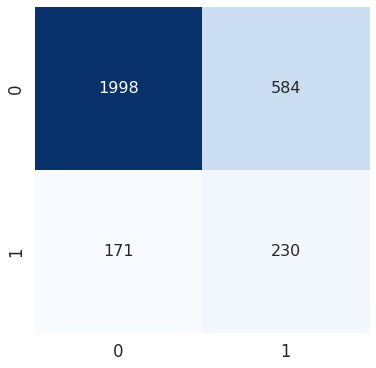

In [ ]:
conf_matrix(y_test, pred_test_opt)

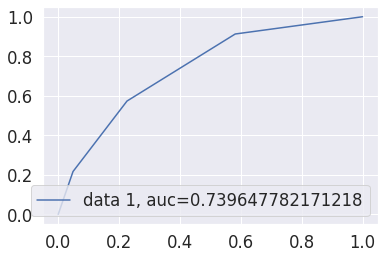

In [ ]:
y_pred_proba = model_dt_opt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

RANDOM FOREST

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

params = {'rf__n_estimators': [5, 10, 20, 50, 100, 120, 140],
          'rf__max_depth': [1, 2, 3, 5, 10, 30, 50],
          'rf__class_weight': [{0:1, 1:4},{0:1, 1:5},{0:1, 1:3},{0:1, 1:2},{0:1, 1:6}]}

gridsearch = GridSearchCV(pipe,
                          param_grid= params,
                          cv=StratifiedKFold(),
                          n_jobs=-1,
                          scoring='f1',
                          verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 245 candidates, totalling 1225 fits


In [ ]:
print('RANDOM FOREST F1 SCORE: ', gridsearch.score(x_test, y_test))

RANDOM FOREST F1 SCORE:  0.37770382695507493


In [ ]:
gridsearch.best_params_

{'rf__class_weight': {0: 1, 1: 5}, 'rf__max_depth': 3, 'rf__n_estimators': 140}

In [ ]:
cw = gridsearch.best_params_['rf__class_weight']
d = gridsearch.best_params_['rf__max_depth']
n = gridsearch.best_params_['rf__n_estimators']


In [ ]:
model_rf_opt = RandomForestClassifier(class_weight=cw, max_depth= d, n_estimators= n)

In [ ]:
model_rf_opt.fit(x_train, y_train)
pred_test_rf_opt = model_rf_opt.predict(x_test)

f1_test = f1_score(y_test, pred_test_rf_opt)
print('Random Forest - F1 score by optimising weights: ', f1_test)

Random Forest - F1 score by optimising weights:  0.37810945273631846


In [ ]:
confusion_matrix(y_test, pred_test_rf_opt)

array([[2005,  577],
       [ 173,  228]])

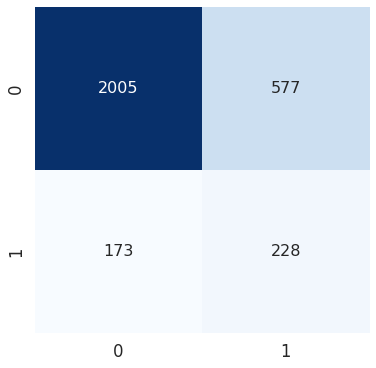

In [ ]:
conf_matrix(y_test, pred_test_rf_opt)

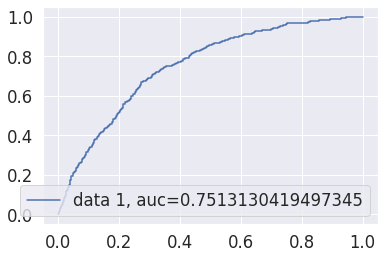

In [ ]:
y_pred_proba_rf = model_rf_opt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

NEURAL NETWORK

In [ ]:
from sklearn.utils import class_weight

In [ ]:
class_weights=[[1,2],[1,2.5],[1,3],[1,3.5],[1,4],[1,4.5],[1,5], [1,5.5],[1,6], [1,6.5], [1,7]]

In [ ]:
for i in range(len(class_weights)):
  class_weights_list = dict(((0, class_weights[i][0]), (1,class_weights[i][1])))
  r = model_tf.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, class_weight = class_weights_list)
  y_pred_nn=model_tf.predict(x_test)
  for i in range(len(y_pred_nn)):
    if (y_pred_nn[i]<0.5):
      y_pred_nn[i]=0
    else:
      y_pred_nn[i]=1

  accuracy_score(y_test, y_pred_nn)
  f1_test = f1_score(y_test, y_pred_nn)
  print('NEURAL NETWORK - F1 score by optimising weights: ', f1_test)

Epoch 1/10
373/373 [==============================] - 1s 3ms/step - loss: 0.5340 - accuracy: 0.8365 - val_loss: 0.3763 - val_accuracy: 0.8545
Epoch 2/10
373/373 [==============================] - 1s 3ms/step - loss: 0.5207 - accuracy: 0.8629 - val_loss: 0.3806 - val_accuracy: 0.8542
Epoch 3/10
373/373 [==============================] - 1s 3ms/step - loss: 0.5194 - accuracy: 0.8647 - val_loss: 0.3777 - val_accuracy: 0.8542
Epoch 4/10
373/373 [==============================] - 1s 3ms/step - loss: 0.5191 - accuracy: 0.8629 - val_loss: 0.3776 - val_accuracy: 0.8545
Epoch 5/10
373/373 [==============================] - 1s 3ms/step - loss: 0.5185 - accuracy: 0.8613 - val_loss: 0.3771 - val_accuracy: 0.8538
Epoch 6/10
373/373 [==============================] - 1s 3ms/step - loss: 0.5173 - accuracy: 0.8634 - val_loss: 0.3792 - val_accuracy: 0.8518
Epoch 7/10
373/373 [==============================] - 1s 3ms/step - loss: 0.5172 - accuracy: 0.8615 - val_loss: 0.3769 - val_accuracy: 0.8548
Epoch 

In [ ]:
class_weights_nn = {0:1, 1:4.5}

In [ ]:
print('Neural Network optimum weights: ', class_weights_nn)

Neural Network optimum weights:  {0: 1, 1: 4.5}


In [ ]:
print(confusion_matrix(y_test, y_pred_nn))

[[1612  970]
 [ 103  298]]


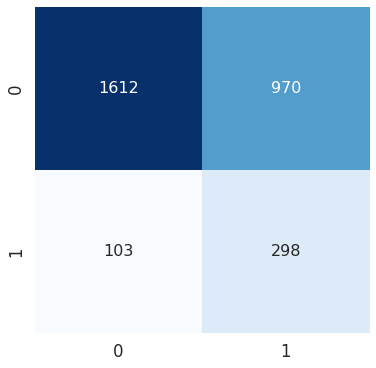

In [ ]:
conf_matrix(y_test,y_pred_nn)

ENSEMBLING

In [ ]:
# https://medium.com/analytics-vidhya/does-ensemble-models-always-improve-accuracy-c114cdbdae77

from sklearn.ensemble import VotingClassifier

# neural
def build_nn():
    model= Sequential([
                       Dense(50,activation='relu',input_shape=[12]),
                       Dense(1,activation='sigmoid')
])
    model.compile(
                optimizer='Adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

keras_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(
                            build_nn,
                            epochs=500,
                            verbose=False)

keras_clf._estimator_type = "classifier"

model_en = VotingClassifier(estimators=[('nn', keras_clf), ('dt', model_dt_opt), ('rf', model_rf_opt), ('lr', model_lr)],  voting='soft', flatten_transform=True)
model_en.fit(x_train,y_train)


VotingClassifier(estimators=[('nn',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7feefcd062b0>),
                             ('dt',
                              DecisionTreeClassifier(class_weight={0: 0.1691457286432161,
                                                                   1: 0.8308542713567839},
                                                     max_depth=2)),
                             ('rf',
                              RandomForestClassifier(class_weight={0: 1, 1: 5},
                                                     max_depth=3,
                                                     n_estimators=140)),
                             ('lr',
                              LogisticRegression(C=0.8286427728546842,
                                                 class_weight={0: 0.22,
                                                               1: 0.78},
                                                 solver='newton-cg'))

In [ ]:
y_pred = model_en.predict(x_test)

94/94 [==============================] - 0s 1ms/step


In [ ]:
print("Ensembing score - all models: ", model_en.score(x_test,y_test))

94/94 [==============================] - 0s 2ms/step
Ensembing score - all models:  0.8223265169292658


In [ ]:
ensembling_f1_score = f1_score(y_test, y_pred)
print("Ensembing F1 score: ", ensembling_f1_score)

Ensembing F1 score:  0.3222506393861893


In [ ]:
# GRID SEARCH ENSEMBLING

In [ ]:
# !pip install scikeras
# from scikeras.wrappers import KerasClassifier

In [ ]:
vc = VotingClassifier([('dt', model_dt_opt), ('rf', model_rf_opt), ('lr', model_lr)])
params = {'voting':['hard','soft'],'weights':[(1,1,1),(1,2,1),(1,1,2)]}

grid = GridSearchCV(vc,params)

grid.fit(x_train, y_train)
grid.best_params_

{'voting': 'hard', 'weights': (1, 1, 2)}

In [ ]:
grid.best_score_

0.7976857390777299

In [ ]:
y_pred_grid = grid.predict(x_test)

In [ ]:
print("Ensembing score (GridSearch) - all models: ", grid.score(x_test,y_test))

Ensembing score (GridSearch) - all models:  0.7894736842105263


In [ ]:
ensembling_f1_score_grid = f1_score(y_test, y_pred_grid)
print("Ensembing (GridSearch) F1 score: ", ensembling_f1_score_grid)

Ensembing (GridSearch) F1 score:  0.38188976377952755


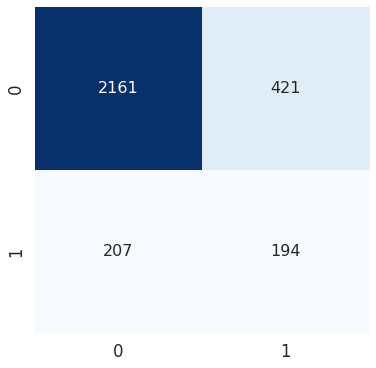

In [ ]:
conf_matrix(y_test,y_pred_grid)

In [ ]:
# ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_adaBoost = AdaBoostClassifier(random_state=1, algorithm='SAMME.R')
model_adaBoost.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
y_pred_adaboost = model_adaBoost.predict(x_test)

In [ ]:
print("Adaboost score : ", model_adaBoost.score(x_test,y_test))

Adaboost score :  0.8672477371773383


In [ ]:
ensembling_f1_score_ada = f1_score(y_test, y_pred_adaboost)
print("Adaboost F1 score: ", ensembling_f1_score_ada)

Adaboost F1 score:  0.09174311926605505


In [ ]:
conf_matrix(y_test, y_pred_nn)

array([[2567,  381],
       [  15,   20]])

In [ ]:
#GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model_gbc.fit(x_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [ ]:
y_pred_gbc = model_gbc.predict(x_test)

In [ ]:
print("GBC score : ", model_gbc.score(x_test,y_test))

GBC score :  0.8655715722427086


In [ ]:
ensembling_f1_score_gbc = f1_score(y_test, y_pred_gbc)
print("Ensembing F1 score: ", ensembling_f1_score_gbc)

Ensembing F1 score:  0.0


In [ ]:
confusion_matrix(y_pred_gbc, y_test)

array([[2582,  401],
       [   0,    0]])

In [ ]:
# XG BOOST

In [ ]:
import xgboost as xgb
model_xgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model_xgb.fit(x_train, y_train)


XGBClassifier(learning_rate=0.01, random_state=1)

In [ ]:
y_pred_xgb = model_xgb.predict(x_test)

In [ ]:
print("XGB score : ", model_xgb.score(x_test,y_test))

XGB score :  0.8665772712034864


In [ ]:
ensembling_f1_score_xgb = f1_score(y_test, y_pred_xgb)
print("XGB F1 score: ", ensembling_f1_score_xgb)

XGB F1 score:  0.08294930875576037


In [ ]:
confusion_matrix(y_pred_xgb, y_test)

array([[2567,  383],
       [  15,   18]])

In [ ]:
#STACKING

In [ ]:
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# get a stacking ensemble of models
def get_stacking_model():

	# base models
	level0 = list()
	# level0.append(('nn', keras_clf))
	level0.append(('dt', model_dt_opt))
	level0.append(('rf', model_rf_opt))
	level0.append(('lr', model_lr))

	# meta learner model
	level1 = LogisticRegression()

	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# list of models to evaluate
def get_models():
	models = dict()
	# models['nn'] = keras_clf
	models['dt'] = model_dt_opt
	models['rf'] = model_rf_opt
	models['lr'] = model_lr
	models['stacking'] = get_stacking_model()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
	return scores

models = get_models()

results, names, f1_scores_list = list(), list(), list()

for name, model in models.items():
  scores = evaluate_model(model, x_train, y_train)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  f1Score = f1_score(y_test, y_pred)
  f1_scores_list.append(f1Score)
  results.append(scores)
  names.append(name)
  print(name, mean(scores), f1Score)

# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.boxplot(f1_scores_list, labels=names, showmeans=True)

pyplot.show()

dt 0.7566204338883679 0.3786008230452675
rf 0.7593860780541146 0.37779618889809446
lr 0.796763834278368 0.38039215686274513
stacking 0.8657392252179046 0.0
